In [1]:
from IPython.display import Image

# Mckinsey and Scikit

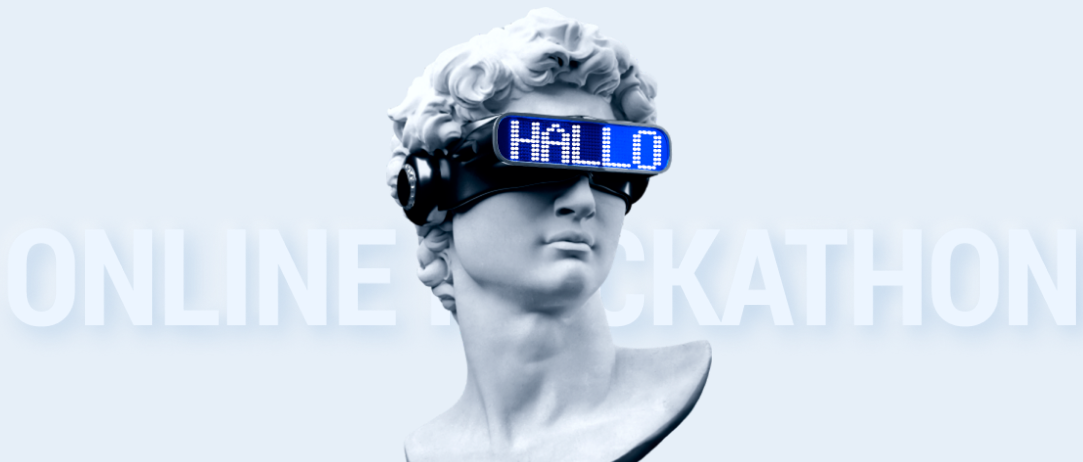

In [2]:
Image(filename="docs/prohack_logo.png")

Prohack competition organized by Mckinsey&Company motivated me to create this notebook. Prohack was the first data science competition, that I participated in. Although I didn't achieve incredible results during the competition, I dedicated decent amount of time to it, and, as such, I decided to invest some more time to better structure and comment everything. As I extensively used scikit library for data preprocessing and modeling, this notebook became not just the search for solution, but the guide on how to use scikit in **supervised learning regression** problems with the input data of many dimensions.

# Importing libraries

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.decomposition import PCA
from sklearn.experimental import enable_iterative_imputer
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import LassoLars
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import BayesianRidge
#from sklearn.linear_model import ARDRegressor
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import Lars
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import GammaRegressor
from sklearn.linear_model import Perceptron
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import PoissonRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

# Presentation

Let's first see the presentation in order to get some potentially valuable information about data

“Beeep…Beeeep….Beeeep… Hooomans*, are you there?...”

This very strange transmission is coming from your narrowband radio signal receiver, pointed towards one of the farthest away galaxies. It’s early morning, you are sitting in your radio observatory high in the mountains.

For the last 10 years you’ve been a Chief Data Scientist in one of the best astrophysics research teams in the world. You are enjoying a quiet time with a cup of coffee and reviewing the data reports from last night, when this strange sound arrived. You almost spill your coffee in surprise. “Am I dreaming?” is your first thought as you move closer towards the speaker and listen…

“Beep…Beeeep….Beeeep… To all Hooomans who can hear us – we need your help”

You lean closer and grab a notebook and a pencil – you don’t really trust computers when it comes to such important tasks as taking notes from a radio transmission. You start recording everything that the strange voice from light years away is saying.

“… We need serious Data Science help and we know you Hooomans are the best at it…. We are an intergalactic species which have almost achieved singularity and the highest possible levels of development. We travel fast through space and explore other galaxies”

“The only essence that we consume is energy, measured in DSML units…Our populace is widespread and we live across many different star clusters and galaxies. What we need now is to optimize our well-being across all those galaxies… We have a lot of data but our сomputers and methods are too weak – we urgently need your data science knowledge to help us”

“Only two steps prevent us from achieving singularity:

* To understand what makes us better off. Our elders used the composite index to measure our well-being performance, but this knowledge has disappeared in the sands of time. Use our data and train your model to predict this index with the highest possible level of certainty.

* To achieve the highest possible level of well-being through optimized allocation of additional energy. We have discovered the star of an unusually high energy of 50000 zillion DSML. We have agreed between ourselves that no one galaxy will consume more than 100 zillion DSML and at least 10% of the total energy will be consumed by galaxies in need with existence expectancy index below 0,7.

Think of our galaxies as your “countries” (or how you call them??) and our population as citizens. We have similar healthcare and wellbeing characteristic as you, Hooomans”

“We are sending all the data to you right now. Let the data be with you, Hoomans… … …”

Transmission suddenly ends. You put your notebook and pencil away and start thinking. You really want to help this species optimize their well-being. You open up Python and upload the dataset from the narrowband radio signal receiver. It will be another great day at the observatory today. Probably intergalactic species meant to say “humans” here but we will never know for sure

The solutions are evaluated on two criteria: predicted future Index values and allocated energy from a newly discovered star

1) Index predictions are evaluated using RMSE metric

2) Energy allocation is also evaluated using RMSE metric and has a set of known factors that need to be taken into account.

Every galaxy has a certain limited potential for improvement in the index described by the following function: 
* Potential for increase in the Index = -np.log(Index+0.01)+3

Likely index increase dependent on potential for improvement and on extra energy availability is described by the following function:
* Likely increase in the Index = extra energy * Potential for increase in the Index **2 / 1000

There are also several constraints:
* in total there are 50000 zillion DSML available for allocation
* no galaxy should be allocated more than 100 zillion DSML or less than 0 zillion DSML
* galaxies with low existence expectancy index below 0.7 should be allocated at least 10% of the total energy available

3) Leaderboard is based on a combined scaled metric:

* 80% prediction task RMSE + 20% optimization task RMSE * lambda

where lambda is a normalizing factor


4) Leaderboard is 80% public and 20% private


5) The submission should be in the following format:

| Variable      | Description                                                      |
|:-------------:|:----------------------------------------------------------------:|
| Index         | Unique index from the test dataset in the ascending order        |
| pred          | Prediction for the index of interest                             |
| opt_pred      | Optimal energy allocation                                        |

# Info from presentation

 * y is level of development
 * Well-being performance is measured by composite index
 * Predict this index with the highest possible level of certainty
 * Galaxies are countries
 * Energy is measured in DSML
 * Optimize well-being
 * What makes each galaxy better
 * Achieve the highest possible level of well-being through optimized allocation of additional energy
 * Star was discovered of an unusually high energy of 50000 zillion DSML 
 * No galaxy will consume more than 100 zillion DSML and at least 10% of the total energy will be consumed by galaxies in need with existence expectancy index below 0,7

# Info from data

Let's load the data and see what we can get from it

In [2]:
data = pd.read_csv("data/train.csv")
data.head()

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052590
1,990025,Camelopardalis B,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,...,NaN,NaN,NaN,NaN,NaN,19.177926,NaN,22.785018,NaN,0.059868
2,990025,Virgo I,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,...,NaN,NaN,NaN,NaN,NaN,21.151265,6.534020,NaN,NaN,0.050449
3,990025,UGC 8651 (DDO 181),0.555862,52.333293,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.912194,NaN,NaN,0.049394
4,990025,Tucana Dwarf,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,...,NaN,NaN,NaN,NaN,NaN,NaN,5.611753,NaN,NaN,0.154247


## Basic analysis

Here I go for more analysis of data distribution. Look at its shape, types of each feature, number of galaxies. There is one more thing that may not be as clear as others. It's "Samples per each feature". Why we may need it? We see that data has HUGE amount of features, and when we start training, we may lack the needed amount of samples for our model to catch the "meaning" of each feature. In such case, features may be learned not properly, and will play a role of random noise, and the model will make lots of mistakes. There is no exact number of how many samples per feature we have to contain in our model for training it properly. However, it is worth to check what is the ratio, and maybe reduce some not so relevant features, in order to simplify the task for the model. Looking at these things, we can set some directions for ourselves about choosing model and application of methods to clean data.

In [4]:
print(f"Shape of input >> {data.shape}")
print(f"Samples for each feature >> {round(data.shape[0]/data.shape[1])}")
galaxies_n = len(set(data["galaxy"]))
print(f"Galaxies >> {galaxies_n}")
print("\nTypes of each feature")
feature_names = data.drop(["galaxy", "galactic year", "y"], axis = 1).columns
    feature_indexes = np.array([i for i in range(len(feature_names))])
    features = pd.DataFrame({"Index" : feature_indexes, "Feature" : feature_names})
for feature in data.columns:
    print(f"{feature} >> {data[feature].dtype}")

Shape of input >> (3865, 80)
Countries for each label >> 48
Countries >> 181

Types of each label
galactic year >> int64
galaxy >> object
existence expectancy index >> float64
existence expectancy at birth >> float64
Gross income per capita >> float64
Income Index >> float64
Expected years of education (galactic years) >> float64
Mean years of education (galactic years) >> float64
Intergalactic Development Index (IDI) >> float64
Education Index >> float64
Intergalactic Development Index (IDI), Rank >> float64
Population using at least basic drinking-water services (%) >> float64
Population using at least basic sanitation services (%) >> float64
Gross capital formation (% of GGP) >> float64
Population, total (millions) >> float64
Population, urban (%) >> float64
Mortality rate, under-five (per 1,000 live births) >> float64
Mortality rate, infant (per 1,000 live births) >> float64
Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)) >> float64
Population, ages

From here we get the following information:

* All the features and label, except for name of the galaxy are numerical
* There are 181 galaxies
* Shape of data is (3865, 80), which means, that we have 79 features
* There are 48 samples per each feature, now this is not good. If we consider every feature to be independent, then we will have a problem with underlearning models. It is also necessary to take into consideration the fact, that when we will split the data into training and validation, then this number will decrease even more. We may want to use dimensionality reduction techniques, but we will come back to it while data preprocessing and modeling.

## Analysing distributions of features

Let's see generate graphs of how features are distributed among the galaxies over the course of years

In [7]:
data_features = data.drop(["galaxy", "galactic year"], axis = 1)
for feature in data_features.columns:
    plt.figure(figsize=(25,12))
    plt.ylabel(f"{feature}")
    plt.xlabel("galactic year")
    plt.title(f"Distribution of {feature}")
    x = np.array(data["galactic year"])
    y = np.array(data_features[feature])
    plt.scatter(x, y)
    graph = f"distribution_{feature}.png"
    plt.savefig(f"output/{graph}")
    plt.close()
    print(feature)

existence expectancy index
existence expectancy at birth
Gross income per capita
Income Index
Expected years of education (galactic years)
Mean years of education (galactic years)
Intergalactic Development Index (IDI)
Education Index
Intergalactic Development Index (IDI), Rank
Population using at least basic drinking-water services (%)
Population using at least basic sanitation services (%)
Gross capital formation (% of GGP)
Population, total (millions)
Population, urban (%)
Mortality rate, under-five (per 1,000 live births)
Mortality rate, infant (per 1,000 live births)
Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))
Population, ages 15–64 (millions)
Population, ages 65 and older (millions)
Life expectancy at birth, male (galactic years)
Life expectancy at birth, female (galactic years)
Population, under age 5 (millions)
Young age (0-14) dependency ratio (per 100 creatures ages 15-64)
Adolescent birth rate (births per 1,000 female creatures ages 15-19)

## Analysing changes in each galaxy's y

Let's generate graphs of how y of galaxies is changing over the course of years

In [8]:
for galaxy in set(data["galaxy"]):
    data_galaxy = data.loc[data["galaxy"] == galaxy]
    plt.figure(figsize=(25,12))
    plt.ylabel("Level")
    plt.xlabel("galactic year")
    plt.title(f"Trend graph for {galaxy}")
    galactic_year = np.array(data_galaxy["galactic year"])
    level = np.array(data_galaxy["y"])
    plt.plot(galactic_year, level, label = "Level")
    graph = f"level_{galaxy}.png"
    plt.savefig(f"output/{graph}")
    plt.close()
    print(galaxy)

NGC 300
KUG 1210+301B (KK98 127)
MB 3
Andromeda II
UGC 7577 (DDO 125)
Andromeda VIII
Pegasus Dwarf Irregular (DDO 216)
Maffei 1
Pisces III (Andromeda XIII)
IC 10 (UGC 192)
Draco Dwarf (DDO 208)
Holmberg II (DDO 50, UGC 4305)
UGCA 86
UGCA 133 (DDO 44)
Pictor II
Antlia B
IC 1613 (UGC 668)
Pegasus Dwarf Sph (And VI)
Hercules Dwarf
IC 3104
Pisces IV (Andromeda XIV)
UGCA 105
Boötes III
NGC 185
ESO 274-01[70]
Sextans A (92205, DDO 75)
Andromeda XVIII[60]
Horologium II
Hydrus I
Lacerta I (Andromeda XXXI)
HIPASS J1247-77
Boötes I
HIZSS 003
ESO 383-087 (ISG 39)
Cassiopeia Dwarf (Cas dSph, Andromeda VII)
Andromeda XVII
NGC 5237
NGC 3109
NGC 1569 (UGC 3056)
Carina III
NGC 1560
Boötes II
Perseus I (Andromeda XXXIII)
Barnard's Galaxy (NGC 6822)
M32 (NGC 221)
UGC 8508 (I Zw 060)
Andromeda Galaxy (M31)
NGC 55
NGC 3741
DDO 99 (UGC 6817)
Andromeda XXIX
NGC 247
Cassiopeia II (Andromeda XXX)
Leo V Dwarf
Andromeda XX
IC 4662 (ESO 102-14)
Grus II
ESO 294-010
Carina II
Grus I
Eridanus II
NGC 2403
Andromeda 

# Loading data

In [7]:
data = pd.read_csv("data/train.csv")
x = data.drop(["galaxy", "galactic year", "y"], axis = 1)
y = data["y"]

# Preprocessing

There are a lot of preprocessing techniques, we will discuss the ones, that are suitable for our type of data, and choose some of them to use

In [ ]:
Image(filename="docs/scalers.png")

## Standardization

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model that relies on the distribution of attributes such as Gaussian processes. Consider if you’re doing PCA, the output can only be interpreted correctly when the features have first been centred around their means.

Standardize generally means changing the values so that the distribution standard deviation from the mean equals one. It outputs something very close to a normal distribution. Scaling is often implied.

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. StandardScaler does not meet the strict definition of scale I introduced earlier. StandardScaler results in a distribution with a standard deviation equal to 1. The variance is equal to 1 also, because variance = standard deviation squared. And 1 squared = 1. StandardScaler makes the mean of the distribution 0. About 68% of the values will lie be between -1 and 1.

Deep learning algorithms often call for zero mean and unit variance. Regression-type algorithms also benefit from normally distributed data with small sample sizes. StandardScaler does distort the relative distances between the feature values, so it’s generally my second choice in this family of transformations.

Use StandardScaler if you need a relatively normal distribution.

In [16]:
tr = preprocessing.StandardScaler().fit(x)
x = tr.transform(x)

## Normalization

Normalization refers to rescaling real valued numeric attributes into the range 0 and 1. It is useful to scale the input attributes for a model that relies on the magnitude of values, such as distance measures used in k-nearest neighbors and in the preparation of coefficients in regression.

Normalize can be used to mean either of the above things (and more!). I suggest you avoid the term normalize, because it has many definitions and is prone to creating confusion.

Normalizer works on the rows, not the columns! I find that very unintuitive. It’s easy to miss this information in the docs. By default, L2 normalization is applied to each observation so the that the values in a row have a unit norm. Unit norm with L2 means that if each element were squared and summed, the total would equal 1. Alternatively, L1 (aka taxicab or Manhattan) normalization can be applied instead of L2 normalization.

Normalizer does transform all the features to values between -1 and 1.

Use Normalizer sparingly — it normalizes sample rows, not feature columns. It can use l2 or l1 normalization.

In [0]:
tr = preprocessing.Normalizer().fit(x)
x = tr.transform(x)

## Scaling

Scale generally means to change the range of the values. The shape of the distribution doesn’t change. A scale model of a building has the same proportions as the original, just smaller. That’s why we say it is drawn to scale. The range is often set at 0 to 1.

For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum.
MinMaxScaler preserves the shape of the original distribution. It doesn’t meaningfully change the information embedded in the original data. MinMaxScaler doesn’t reduce the importance of outliers. The default range for the feature returned by MinMaxScaler is 0 to 1.

Use MinMaxScaler as the default if you are transforming a feature. It’s non-distorting.

In [ ]:
tr = preprocessing.MinMaxScaler().fit(x)
x = tr.transform(x)

## Robust

If your data contains many outliers, scaling using the mean and variance of the data is likely to not work very well. In these cases, you can use robust_scale and RobustScaler as drop-in replacements instead. They use more robust estimates for the center and range of your data.

RobustScaler transforms the feature vector by subtracting the median and then dividing by the interquartile range (75% value — 25% value). Like MinMaxScaler, our feature with large values — normal-big — is now of similar scale to the other features. RobustScaler does not scale the data into a predetermined interval like MinMaxScaler. The range for each feature after RobustScaler is applied is larger than it was for MinMaxScaler. Use RobustScaler if you want to reduce the effects of outliers, relative to MinMaxScaler.

Use RobustScaler if you have outliers and want to reduce their influence. However, you might be better off removing the outliers, instead.

In [0]:
tr = preprocessing.RobustScaler().fit(x)
x = tr.transform(x)

## Power transformation

Power transforms are a family of parametric, monotonic transformations that aim to map data from any distribution to as close to a Gaussian distribution as possible in order to stabilize variance and minimize skewness.

In [0]:
tr = preprocessing.PowerTransformer(method="yeo-johnson", standardize=True).fit(x)
x = tr.transform(x)

## PCA

It is a method that uses simple matrix operations from linear algebra and statistics to calculate a projection of the original data into the same number or fewer dimensions. Fewer input variables can result in a simpler predictive model that may have better performance when making predictions on new data.

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

It uses the LAPACK implementation of the full SVD or a randomized truncated SVD by the method of Halko et al. 2009, depending on the shape of the input data and the number of components to extract.

 * 15 seems to be good value
 * Setting whiten=True, can help to remove outliers

In [0]:
pca = PCA(n_components=75).fit(x)
x = pca.transform(x)
print(f"Shape of pca input >> {x.shape}")

Shape of pca input >> (3865, 75)


## Univariate feature imputation

One type of imputation algorithm is univariate, which imputes values in the i-th feature dimension using only non-missing values in that feature dimension (e.g. impute.SimpleImputer). By contrast, multivariate imputation algorithms use the entire set of available feature dimensions to estimate the missing values (e.g. impute.IterativeImputer).

The SimpleImputer class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. This class also allows for different missing values encodings.

In [17]:
tr = SimpleImputer(missing_values=np.nan, strategy="mean").fit(x)
x = tr.transform(x)

## Multivariate feature imputation

A more sophisticated approach is to use the IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

In [11]:
tr = IterativeImputer(max_iter=125, random_state=0).fit(x)
x = tr.transform(x)

## Nearest neighbors imputation

The KNNImputer class provides imputation for filling in missing values using the k-Nearest Neighbors approach. By default, a euclidean distance metric that supports missing values, nan_euclidean_distances, is used to find the nearest neighbors. Each missing feature is imputed using values from n_neighbors nearest neighbors that have a value for the feature. The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor. If a sample has more than one feature missing, then the neighbors for that sample can be different depending on the particular feature being imputed. When the number of available neighbors is less than n_neighbors and there are no defined distances to the training set, the training set average for that feature is used during imputation. If there is at least one neighbor with a defined distance, the weighted or unweighted average of the remaining neighbors will be used during imputation. If a feature is always missing in training, it is removed during transform.

In [0]:
tr = KNNImputer(weights="uniform").fit(x)
x = tr.transform(x)

## Fill NA

Just choosing a number to put in all the empty samples (usually the best way is to use 0, to show that these samples are missing)

In [5]:
x = x.fillna(0)

## Train and test split

We split data into train and test data. Actually, we are working with train data now, having unlabelled test data as a task. However, in order to measure performance of our model accurately, we split data one more time, as such, we have train data, validation data (which is called here test data, as we are testing model on it), and test data.

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)#x_train, y_train, x_test, y_test = x[:3000], y[:3000], x[3000:], y[3000:]

# Feature importance

Random Forest and other tree models are widely used for feature selection. For example, all the sklearn "tree" models return a feature importance vector after fitting. Features don't get implemented in every version of a popular algorithm if they're not being commonly used.

These "importances" are only strictly meaningful with respect to the original model that was fit, but since the tree model is able to utilize any kind of mutual information in any input variable, including non-linear and interactions with other variables, the fact that a random forest was never able to find any use at all for a particular variable regardless of which random subset of features were used to fit a tree provides fairly strong evidence that the independent variable in question is unrelated to the dependent variable. Therefore IVs with zero or almost zero importance are good candidates for exclusion during feature selection phase. On the other hand, just because a feature was given some importance by a RF model, that doesn't mean it can be successfully used by a linear model... I guess I would say the feature importance reported by RF have good specificity but medium-low sensitivity.

l1 regularization (Lasso/ElasticNet) is mainly useful when you've already decided that you're going to build a white-box statistical model using an LM or GLM or some kind and have some idea of what the model specification should look like - which main effects you want, interaction terms, etc., and just want to make sure you aren't including anything which isn't statistically significant. Then l1 regularization is very close to a free lunch. Its fast and consistent - because the cost function is convex (but not strictly convex, unfortunately), a single invocation of the optimization algorithm will reach a global minima. The method can be justified from the point of view of Bayesian statistics as the choice of a particular prior.. It avoids the multiple hypothesis testing problems of stepwise feature selection.

Note this key difference: RF feature importance will tell you if there's any information to be squeezed out of a particular variable, perhaps in conjunction with several other variables, or perhaps as a non-linear effect. l1 regularization will drive a model parameter to zero if is already close to zero given the linear model that you have specified.

This last point relates back to the final part of your question, "does the low complexity of linear models lead to more robust features?" And the answer there is "it depends." Yes, low complexity models, such as a model with only main effect terms, might be more robust... but it could also be under-specified. We have to check for heteroskedasticity, normality of the residuals, etc. In general, a model can have three failure modes:

The regression model is "underspecified."
The regression model contains one or more "extraneous variables."
The regression model is "overspecified."
Of these, the only one which l1-regularization actually addresses is the second one, extraneous variables. It's up to you to address the first by ensuring that all possible meaningful interaction terms and polynomial terms are included, and to address the third by checking for multiple colinearity (or perhaps also including l2-regularization a la ElasticNet.)

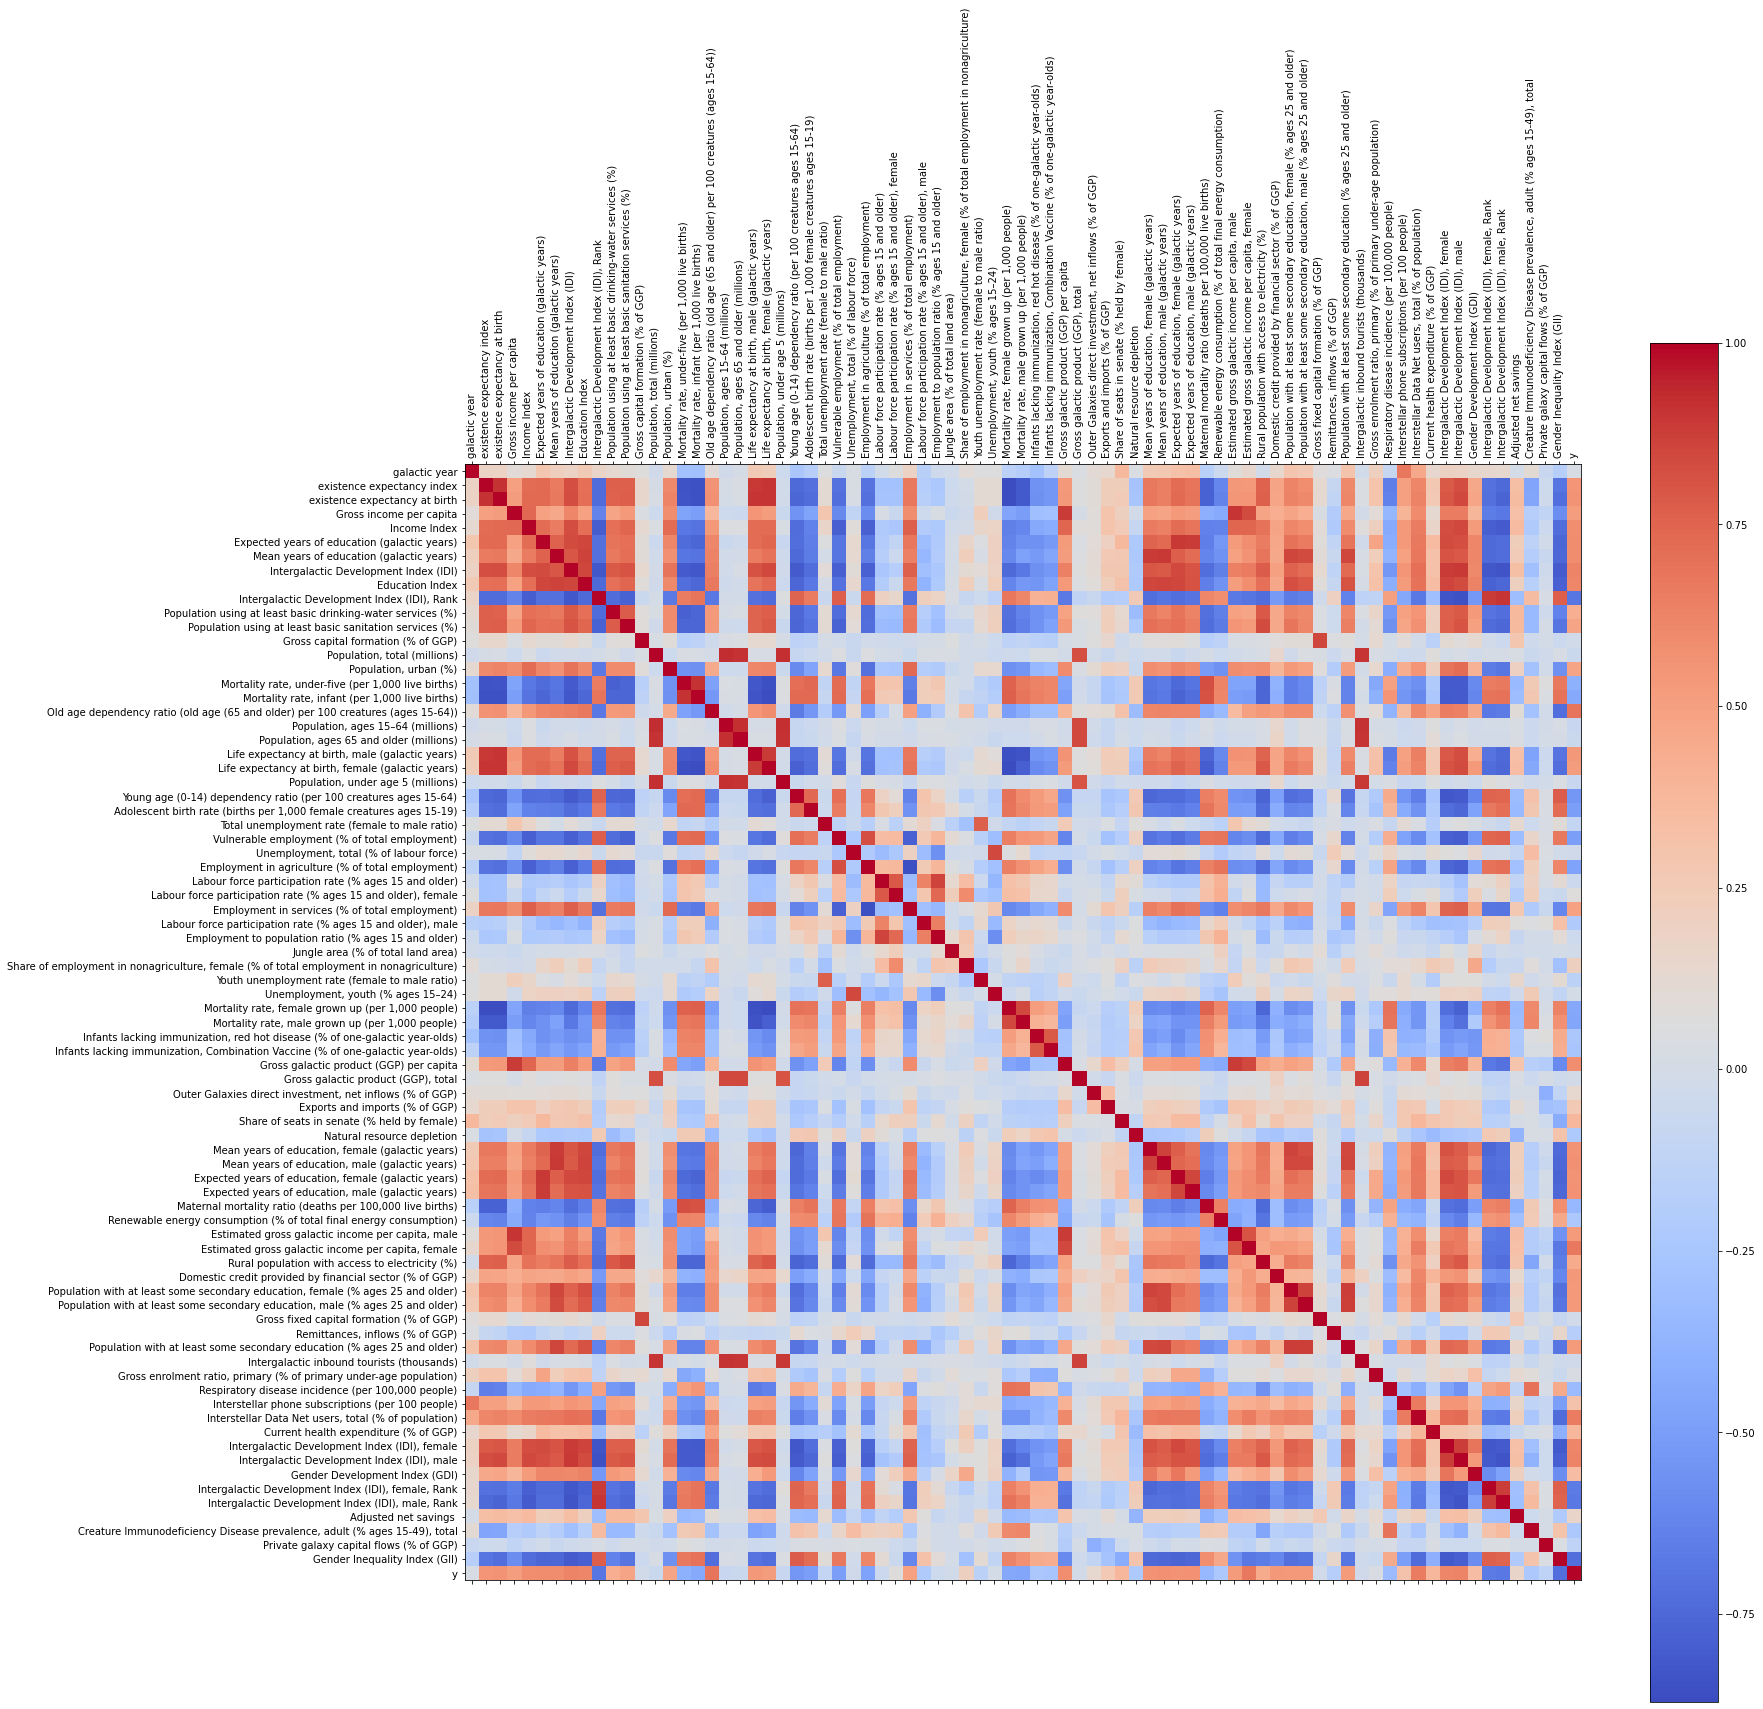

In [8]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(25, 25))
c = ax.matshow(corr, cmap="coolwarm")
fig.colorbar(c)
plt.xticks(rotation=90)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.savefig("output/features.png")

In [19]:
def feature_importance(importances, model):
    feature_names = data.drop(["galaxy", "galactic year", "y"], axis = 1).columns
    feature_indexes = np.array([i for i in range(len(feature_names))])
    features = pd.DataFrame({"Index" : feature_indexes, "Feature" : feature_names})
    for index, feature in zip(features["Index"], features["Feature"]):
        print(f"Feature {index} \"{feature}\" has importance of {round(importances[index], 5)}")
    print(f"Sum of feature importances is {np.sum(importances)}")

    plt.figure(figsize=(25,12))
    plt.title("Feature importance")
    plt.ylabel("Importance")
    plt.xlabel("Features")
    plt.xticks(features["Index"])
    plt.bar(features["Index"], importances)
    graph = f"feature_importance_{model}.png"
    plt.savefig(f"output/{graph}")

RMSE value of 125 estimators of train is 0.00996
RMSE value of 125 estimators of test is 0.03232
Feature "existence expectancy index" has importance of 0.00027
Feature "existence expectancy at birth" has importance of 0.00028
Feature "Gross income per capita" has importance of 0.00033
Feature "Income Index" has importance of 0.00021
Feature "Expected years of education (galactic years)" has importance of 0.00014
Feature "Mean years of education (galactic years)" has importance of 0.0002
Feature "Intergalactic Development Index (IDI)" has importance of 0.00024
Feature "Education Index" has importance of 0.0003
Feature "Intergalactic Development Index (IDI), Rank" has importance of 0.00032
Feature "Population using at least basic drinking-water services (%)" has importance of 6e-05
Feature "Population using at least basic sanitation services (%)" has importance of 5e-05
Feature "Gross capital formation (% of GGP)" has importance of 2e-05
Feature "Population, total (millions)" has importa

<BarContainer object of 77 artists>

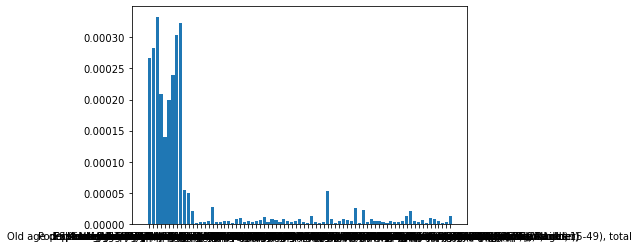

In [14]:
model = RandomForestRegressor(n_estimators=125, criterion="mse", max_features=0.2, max_depth=None) 
model.fit(x_train, y_train) 

predictions_train = model.predict(x_train)
error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
print(f"RMSE value of 125 estimators of train is {round(error_train, 5)}")

predictions_test = model.predict(x_test)
error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
print(f"RMSE value of 125 estimators of test is {round(error_test, 5)}")

i = 0
features = data.drop(["galaxy", "galactic year", "y"], axis = 1).columns
importances = permutation_importance(model, x_train, y_train, scoring="neg_mean_squared_error").importances_mean
for feature in features:
    print(f"Feature \"{feature}\" has importance of {round(importances[i], 5)}")
    i += 1

plt.bar(features, importances)

# Popular Models

## Random forest

In [12]:
RandomForestRegressor?

Init signature:
RandomForestRegressor(
    n_estimators=100,
    *,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of classifying
decision trees on various sub-samples of the dataset and uses averaging
to improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the fore

RMSE value of train is 0.01021
RMSE value of test is 0.0322
Feature 0 "existence expectancy index" has importance of 0.05525
Feature 1 "existence expectancy at birth" has importance of 0.07096
Feature 2 "Gross income per capita" has importance of 0.11248
Feature 3 "Income Index" has importance of 0.09159
Feature 4 "Expected years of education (galactic years)" has importance of 0.05806
Feature 5 "Mean years of education (galactic years)" has importance of 0.05781
Feature 6 "Intergalactic Development Index (IDI)" has importance of 0.10546
Feature 7 "Education Index" has importance of 0.07504
Feature 8 "Intergalactic Development Index (IDI), Rank" has importance of 0.16783
Feature 9 "Population using at least basic drinking-water services (%)" has importance of 0.01065
Feature 10 "Population using at least basic sanitation services (%)" has importance of 0.01246
Feature 11 "Gross capital formation (% of GGP)" has importance of 0.00625
Feature 12 "Population, total (millions)" has importa

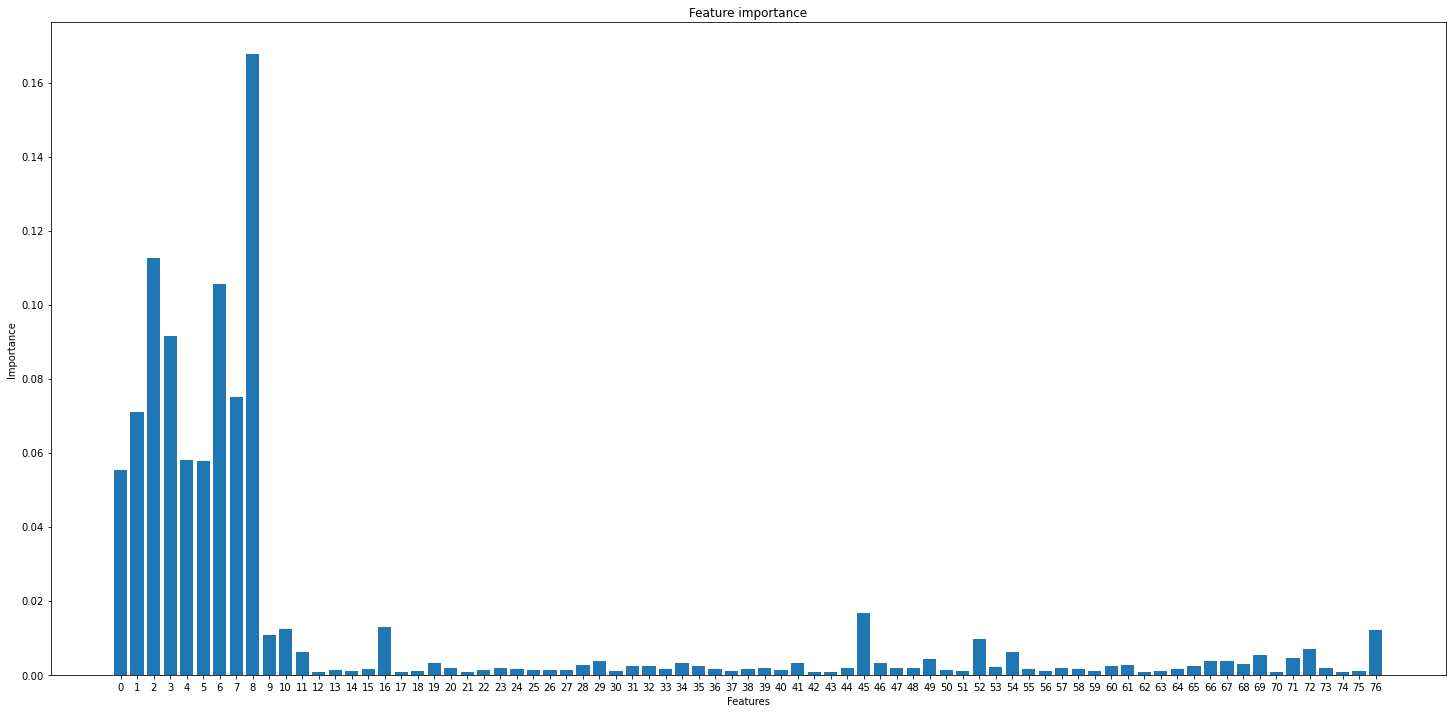

In [32]:
def create_model(x_train, y_train, x_test, y_test):
    model = RandomForestRegressor(n_estimators=125, criterion="mse", max_features=0.2, max_depth=None) 
    model.fit(x_train, y_train) 

    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value of test is {round(error_test, 5)}")
    return model

    
model = create_model(x_train, y_train, x_test, y_test)
importances = model.feature_importances_
feature_importance(importances, "random_forest")

## Extrarandom forest

In [13]:
ExtraTreesRegressor?

Init signature:
ExtraTreesRegressor(
    n_estimators=100,
    *,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=False,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
An extra-trees regressor.

This class implements a meta estimator that fits a number of
randomized decision trees (a.k.a. extra-trees) on various sub-samples
of the dataset and uses averaging to improve the predictive accuracy
and control over-fitting.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"

RMSE value of train is 0.0
RMSE value of test is 0.02986
Feature 0 "existence expectancy index" has importance of 0.0748
Feature 1 "existence expectancy at birth" has importance of 0.06149
Feature 2 "Gross income per capita" has importance of 0.10876
Feature 3 "Income Index" has importance of 0.08259
Feature 4 "Expected years of education (galactic years)" has importance of 0.05912
Feature 5 "Mean years of education (galactic years)" has importance of 0.05438
Feature 6 "Intergalactic Development Index (IDI)" has importance of 0.14391
Feature 7 "Education Index" has importance of 0.12642
Feature 8 "Intergalactic Development Index (IDI), Rank" has importance of 0.10568
Feature 9 "Population using at least basic drinking-water services (%)" has importance of 0.01596
Feature 10 "Population using at least basic sanitation services (%)" has importance of 0.01194
Feature 11 "Gross capital formation (% of GGP)" has importance of 0.00777
Feature 12 "Population, total (millions)" has importance 

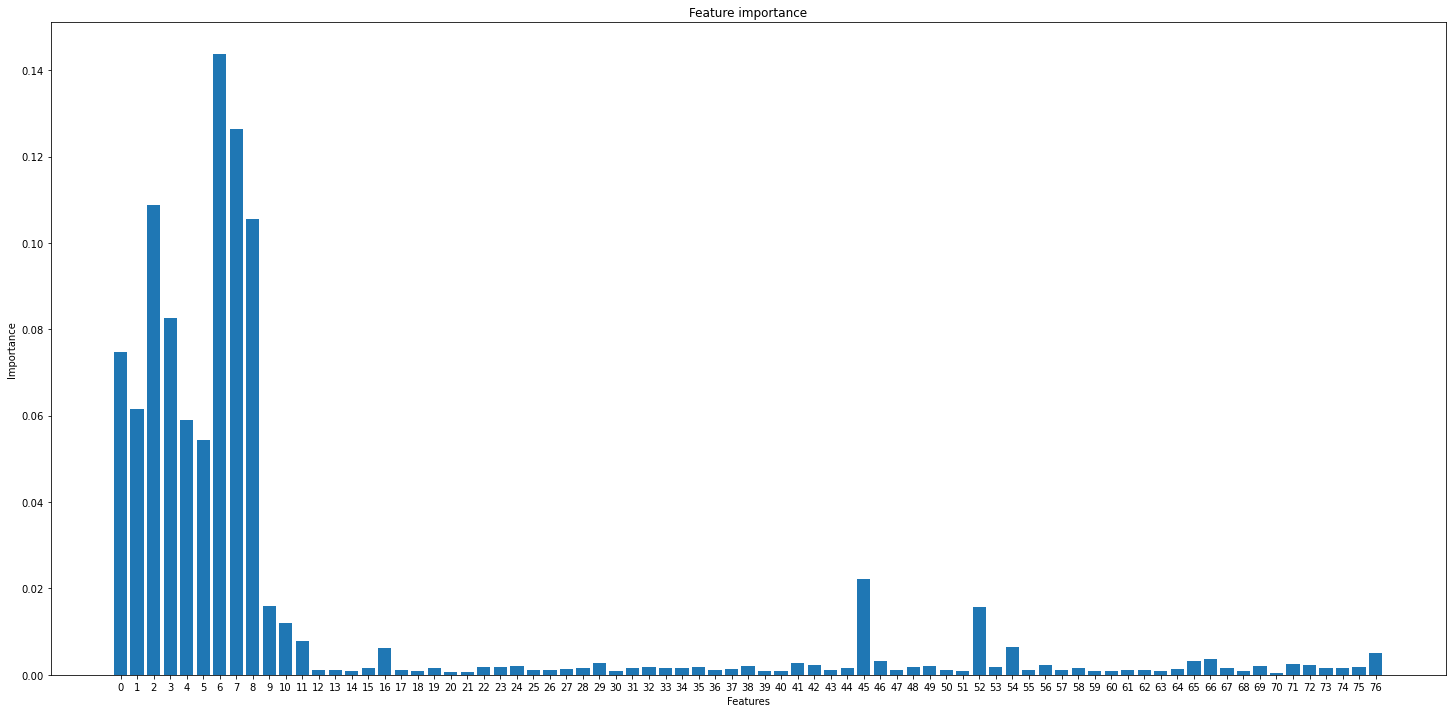

In [26]:
def create_model(x_train, y_train, x_test, y_test):
    model = ExtraTreesRegressor(criterion="mse", max_depth=None, max_features=77, n_estimators=125, random_state=0) 
    model.fit(x_train, y_train) 

    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value of test is {round(error_test, 5)}")
    return model

    
model = create_model(x_train, y_train, x_test, y_test)
importances = model.feature_importances_
feature_importance(importances, "extra_random_forest")

## Linear regression

In [14]:
LinearRegression?

Init signature:
LinearRegression(
    *,
    fit_intercept=True,
    normalize=False,
    copy_X=True,
    n_jobs=None,
)
Docstring:     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

normalize : bool, default=False
    This parameter is ignored when ``fit_intercept`` is set to False.
    If True, the regressors X will be normalized before regression by
    subtracting the mean and dividing by the l2-norm.
    If you wish to standardize, please use
    :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
    an estimator with ``normalize=False`

RMSE value of train is 0.0377
RMSE value of test is 0.04509
Feature 0 "existence expectancy index" has importance of 0.02887
Feature 1 "existence expectancy at birth" has importance of 0.00038
Feature 2 "Gross income per capita" has importance of 0.0
Feature 3 "Income Index" has importance of -0.0059
Feature 4 "Expected years of education (galactic years)" has importance of 0.00086
Feature 5 "Mean years of education (galactic years)" has importance of 0.00126
Feature 6 "Intergalactic Development Index (IDI)" has importance of 0.01028
Feature 7 "Education Index" has importance of 0.04946
Feature 8 "Intergalactic Development Index (IDI), Rank" has importance of -0.0003
Feature 9 "Population using at least basic drinking-water services (%)" has importance of -7e-05
Feature 10 "Population using at least basic sanitation services (%)" has importance of 0.0
Feature 11 "Gross capital formation (% of GGP)" has importance of -0.00011
Feature 12 "Population, total (millions)" has importance of -

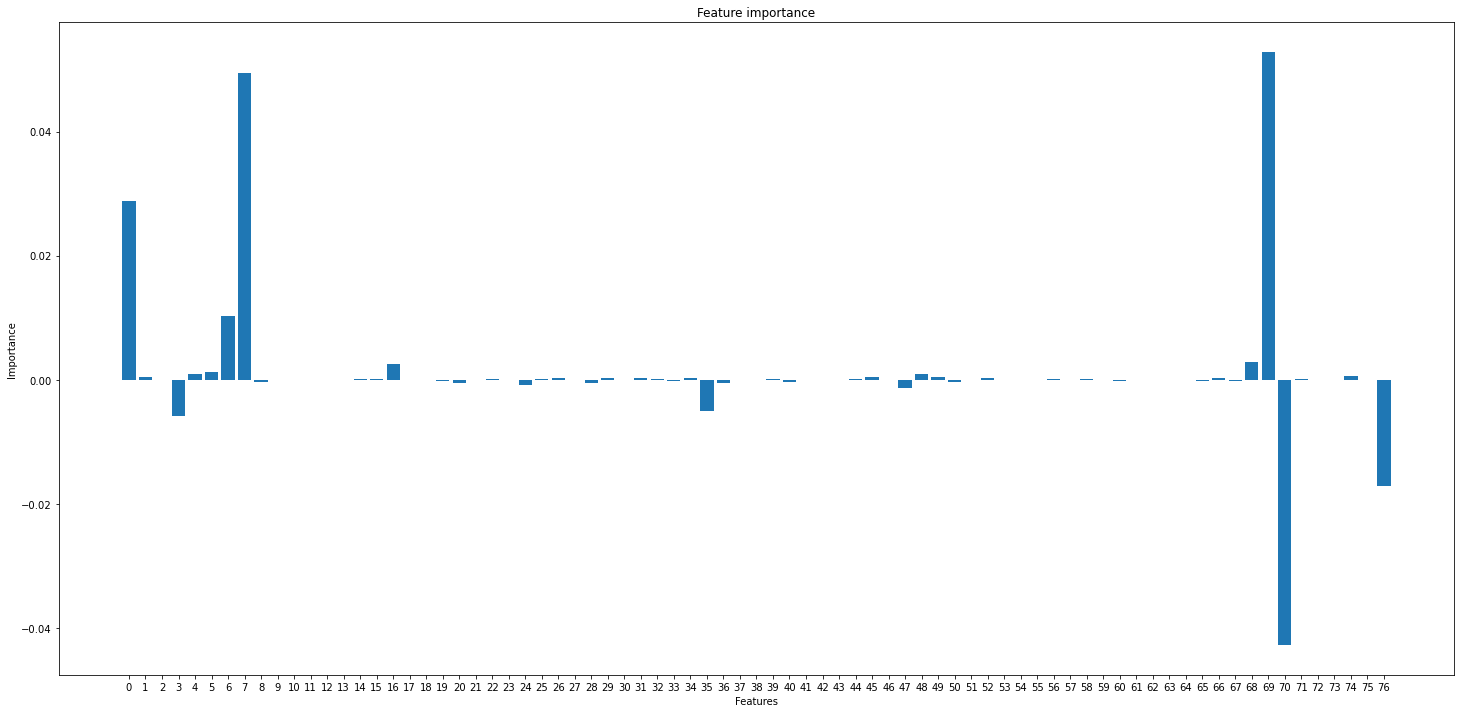

In [34]:
def create_model(x_train, y_train, x_test, y_test):
    model = LinearRegression()
    model.fit(x_train, y_train) 

    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value of test is {round(error_test, 5)}")
    return model


model = create_model(x_train, y_train, x_test, y_test)
importances = model.coef_
feature_importance(importances, "random_forest")

## Lasso regresion

In [15]:
Lasso?

Init signature:
Lasso(
    alpha=1.0,
    *,
    fit_intercept=True,
    normalize=False,
    precompute=False,
    copy_X=True,
    max_iter=1000,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Docstring:     
Linear Model trained with L1 prior as regularizer (aka the Lasso)

The optimization objective for Lasso is::

    (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

Technically the Lasso model is optimizing the same objective function as
the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).

Read more in the :ref:`User Guide <lasso>`.

Parameters
----------
alpha : float, default=1.0
    Constant that multiplies the L1 term. Defaults to 1.0.
    ``alpha = 0`` is equivalent to an ordinary least square, solved
    by the :class:`LinearRegression` object. For numerical
    reasons, using ``alpha = 0`` with the ``Lasso`` object is not advised.
    Given this, you should use the :class:`LinearRegression` object.

fit

RMSE value of train is 0.05097
RMSE value of test is 0.05739
Feature 0 "existence expectancy index" has importance of 0.0
Feature 1 "existence expectancy at birth" has importance of 0.0
Feature 2 "Gross income per capita" has importance of 0.0
Feature 3 "Income Index" has importance of 0.0
Feature 4 "Expected years of education (galactic years)" has importance of 0.0
Feature 5 "Mean years of education (galactic years)" has importance of 0.0
Feature 6 "Intergalactic Development Index (IDI)" has importance of 0.0
Feature 7 "Education Index" has importance of 0.0
Feature 8 "Intergalactic Development Index (IDI), Rank" has importance of -0.0
Feature 9 "Population using at least basic drinking-water services (%)" has importance of -0.0
Feature 10 "Population using at least basic sanitation services (%)" has importance of 0.0
Feature 11 "Gross capital formation (% of GGP)" has importance of -0.0
Feature 12 "Population, total (millions)" has importance of -0.0
Feature 13 "Population, urban (%

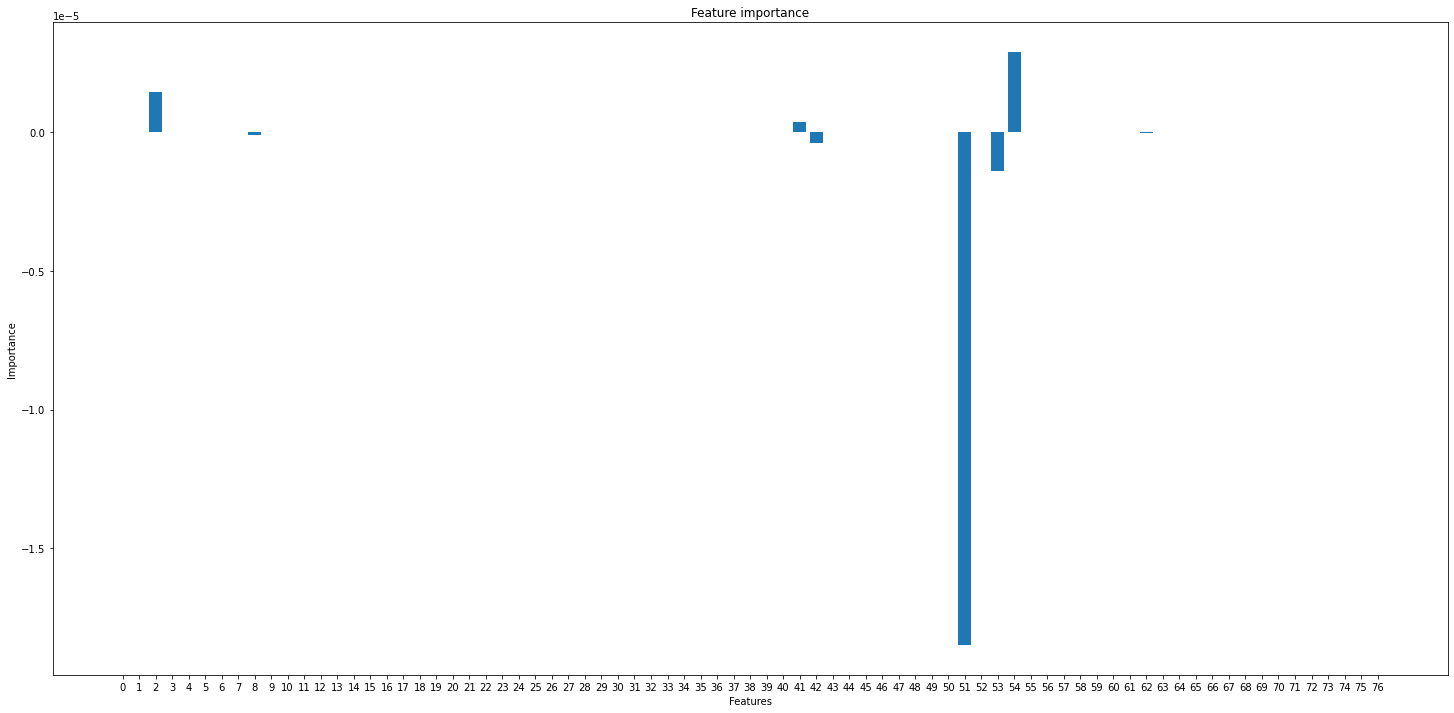

In [35]:
def create_model(x_train, y_train, x_test, y_test):
    model = Lasso()
    model.fit(x_train, y_train) 

    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value of test is {round(error_test, 5)}")
    return model


model = create_model(x_train, y_train, x_test, y_test)
importances = model.coef_
feature_importance(importances, "random_forest")

## Ridge regression

In [16]:
Ridge?

Init signature:
Ridge(
    alpha=1.0,
    *,
    fit_intercept=True,
    normalize=False,
    copy_X=True,
    max_iter=None,
    tol=0.001,
    solver='auto',
    random_state=None,
)
Docstring:     
Linear least squares with l2 regularization.

Minimizes the objective function::

||y - Xw||^2_2 + alpha * ||w||^2_2

This model solves a regression model where the loss function is
the linear least squares function and regularization is given by
the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
This estimator has built-in support for multi-variate regression
(i.e., when y is a 2d-array of shape (n_samples, n_targets)).

Read more in the :ref:`User Guide <ridge_regression>`.

Parameters
----------
alpha : {float, ndarray of shape (n_targets,)}, default=1.0
    Regularization strength; must be a positive float. Regularization
    improves the conditioning of the problem and reduces the variance of
    the estimates. Larger values specify stronger regularization.
    A

RMSE value of train is 0.0377
RMSE value of test is 0.04511
Feature 0 "existence expectancy index" has importance of 0.02669
Feature 1 "existence expectancy at birth" has importance of 0.00041
Feature 2 "Gross income per capita" has importance of 0.0
Feature 3 "Income Index" has importance of -0.00549
Feature 4 "Expected years of education (galactic years)" has importance of 0.00089
Feature 5 "Mean years of education (galactic years)" has importance of 0.00132
Feature 6 "Intergalactic Development Index (IDI)" has importance of 0.01113
Feature 7 "Education Index" has importance of 0.04742
Feature 8 "Intergalactic Development Index (IDI), Rank" has importance of -0.0003
Feature 9 "Population using at least basic drinking-water services (%)" has importance of -7e-05
Feature 10 "Population using at least basic sanitation services (%)" has importance of 0.0
Feature 11 "Gross capital formation (% of GGP)" has importance of -0.00011
Feature 12 "Population, total (millions)" has importance of 

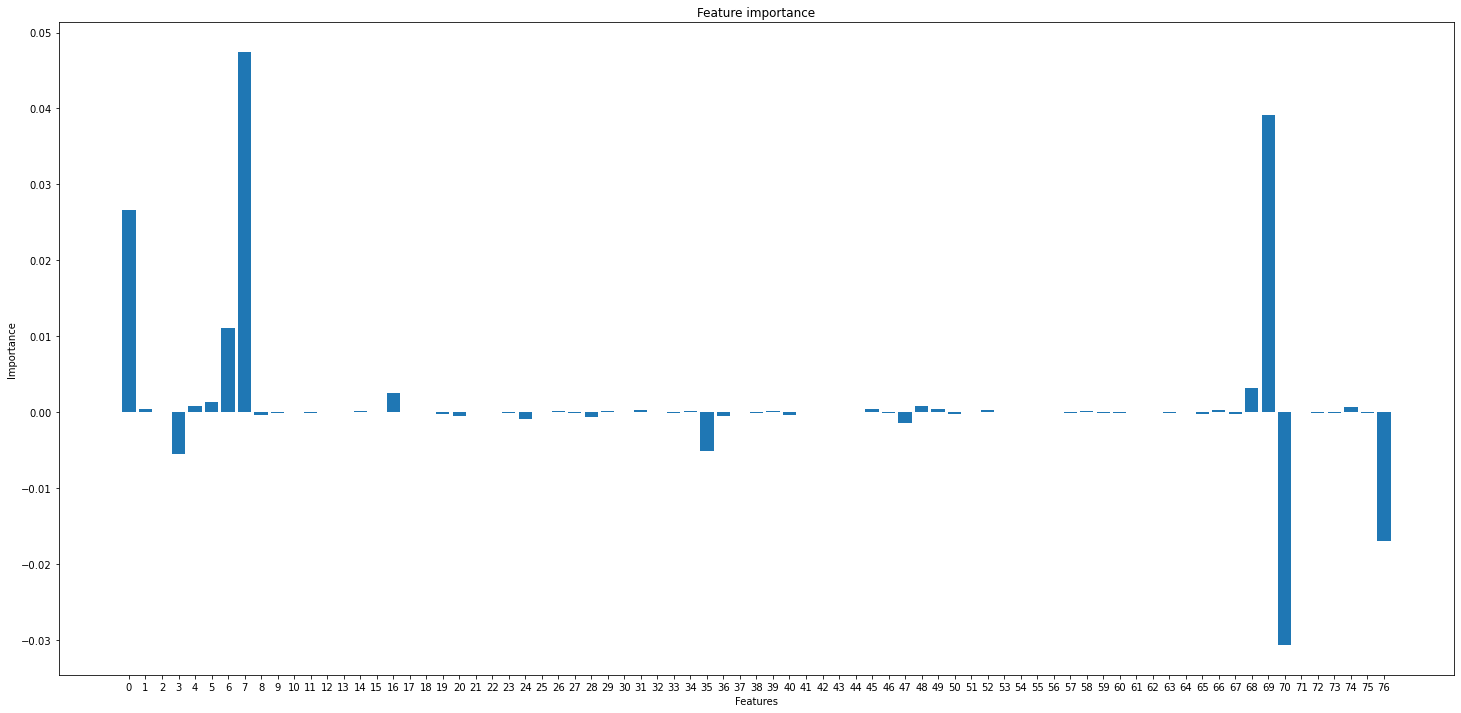

In [39]:
def create_model(x_train, y_train, x_test, y_test):
    model = Ridge()
    model.fit(x_train, y_train) 

    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value of test is {round(error_test, 5)}")
    return model


model = create_model(x_train, y_train, x_test, y_test)
importances = model.coef_
feature_importance(importances, "random_forest")

## SGD regression

In [17]:
SGDRegressor?

Init signature:
SGDRegressor(
    loss='squared_loss',
    *,
    penalty='l2',
    alpha=0.0001,
    l1_ratio=0.15,
    fit_intercept=True,
    max_iter=1000,
    tol=0.001,
    shuffle=True,
    verbose=0,
    epsilon=0.1,
    random_state=None,
    learning_rate='invscaling',
    eta0=0.01,
    power_t=0.25,
    early_stopping=False,
    validation_fraction=0.1,
    n_iter_no_change=5,
    warm_start=False,
    average=False,
)
Docstring:     
Linear model fitted by minimizing a regularized empirical loss with SGD

SGD stands for Stochastic Gradient Descent: the gradient of the loss is
estimated each sample at a time and the model is updated along the way with
a decreasing strength schedule (aka learning rate).

The regularizer is a penalty added to the loss function that shrinks model
parameters towards the zero vector using either the squared euclidean norm
L2 or the absolute norm L1 or a combination of both (Elastic Net). If the
parameter update crosses the 0.0 value because of t

RMSE value of train is 3.620385188785634e+18
RMSE value of test is 3.7024814282383104e+18
Feature 0 "existence expectancy index" has importance of 21413546216.83666
Feature 1 "existence expectancy at birth" has importance of 1619279856019.8015
Feature 2 "Gross income per capita" has importance of 2157776787966.4912
Feature 3 "Income Index" has importance of -59789700591.77839
Feature 4 "Expected years of education (galactic years)" has importance of -1746382264458.7068
Feature 5 "Mean years of education (galactic years)" has importance of -1863492023186.2139
Feature 6 "Intergalactic Development Index (IDI)" has importance of -116680938253.96877
Feature 7 "Education Index" has importance of -156481049702.194
Feature 8 "Intergalactic Development Index (IDI), Rank" has importance of -23405393073518.418
Feature 9 "Population using at least basic drinking-water services (%)" has importance of -28815021508446.008
Feature 10 "Population using at least basic sanitation services (%)" has import

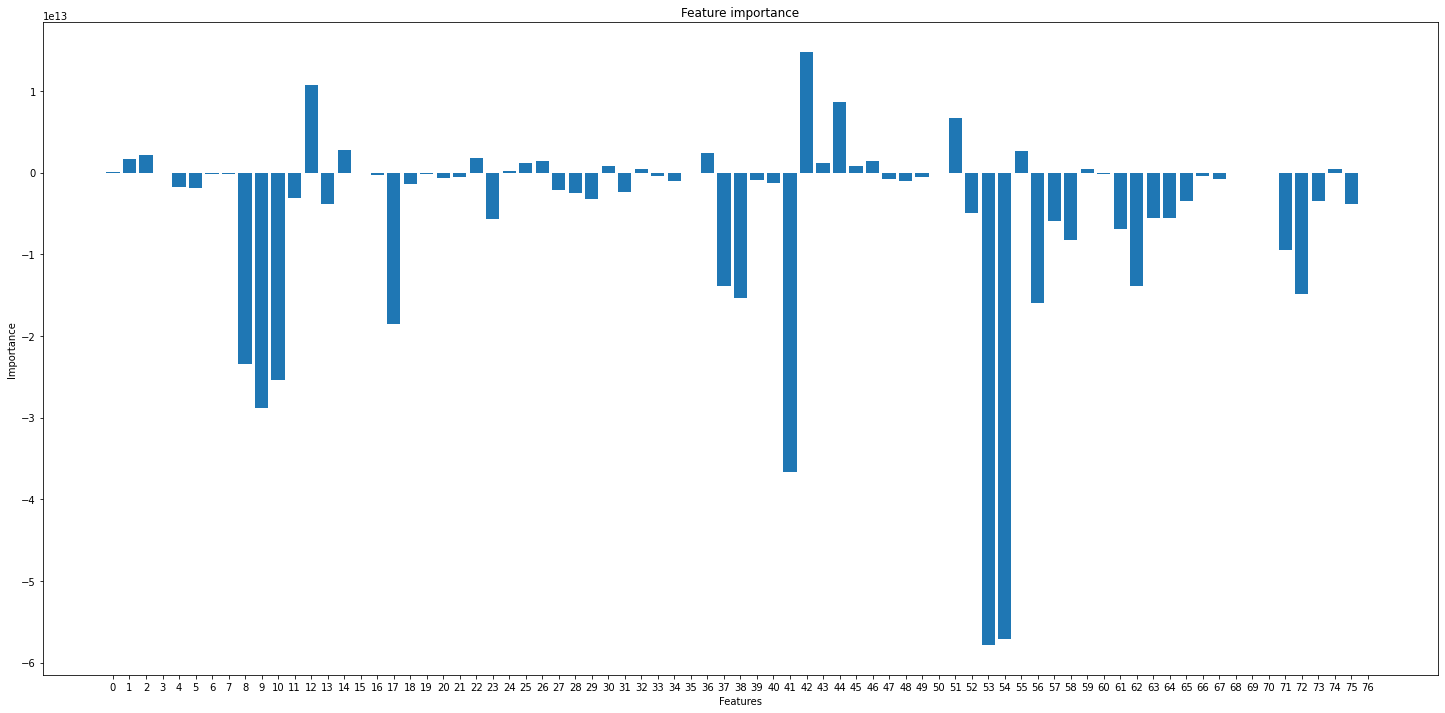

In [42]:
def create_model(x_train, y_train, x_test, y_test):
    model = SGDRegressor()
    model.fit(x_train, y_train) 

    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value of test is {round(error_test, 5)}")
    return model


model = create_model(x_train, y_train, x_test, y_test)
importances = model.coef_
feature_importance(importances, "random_forest")

## ElasticNet regression

In [18]:
ElasticNet?

Init signature:
ElasticNet(
    alpha=1.0,
    *,
    l1_ratio=0.5,
    fit_intercept=True,
    normalize=False,
    precompute=False,
    max_iter=1000,
    copy_X=True,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Docstring:     
Linear regression with combined L1 and L2 priors as regularizer.

Minimizes the objective function::

        1 / (2 * n_samples) * ||y - Xw||^2_2
        + alpha * l1_ratio * ||w||_1
        + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

If you are interested in controlling the L1 and L2 penalty
separately, keep in mind that this is equivalent to::

        a * L1 + b * L2

where::

        alpha = a + b and l1_ratio = a / (a + b)

The parameter l1_ratio corresponds to alpha in the glmnet R package while
alpha corresponds to the lambda parameter in glmnet. Specifically, l1_ratio
= 1 is the lasso penalty. Currently, l1_ratio <= 0.01 is not reliable,
unless you supply your own sequence of alpha.

Read

RMSE value of train is 0.04882
RMSE value of test is 0.05541
Feature 0 "existence expectancy index" has importance of 0.0
Feature 1 "existence expectancy at birth" has importance of 0.0
Feature 2 "Gross income per capita" has importance of 0.0
Feature 3 "Income Index" has importance of 0.0
Feature 4 "Expected years of education (galactic years)" has importance of 0.0
Feature 5 "Mean years of education (galactic years)" has importance of 0.0
Feature 6 "Intergalactic Development Index (IDI)" has importance of 0.0
Feature 7 "Education Index" has importance of 0.0
Feature 8 "Intergalactic Development Index (IDI), Rank" has importance of -0.00013
Feature 9 "Population using at least basic drinking-water services (%)" has importance of 0.0
Feature 10 "Population using at least basic sanitation services (%)" has importance of 0.0
Feature 11 "Gross capital formation (% of GGP)" has importance of 0.0
Feature 12 "Population, total (millions)" has importance of -0.0
Feature 13 "Population, urban 

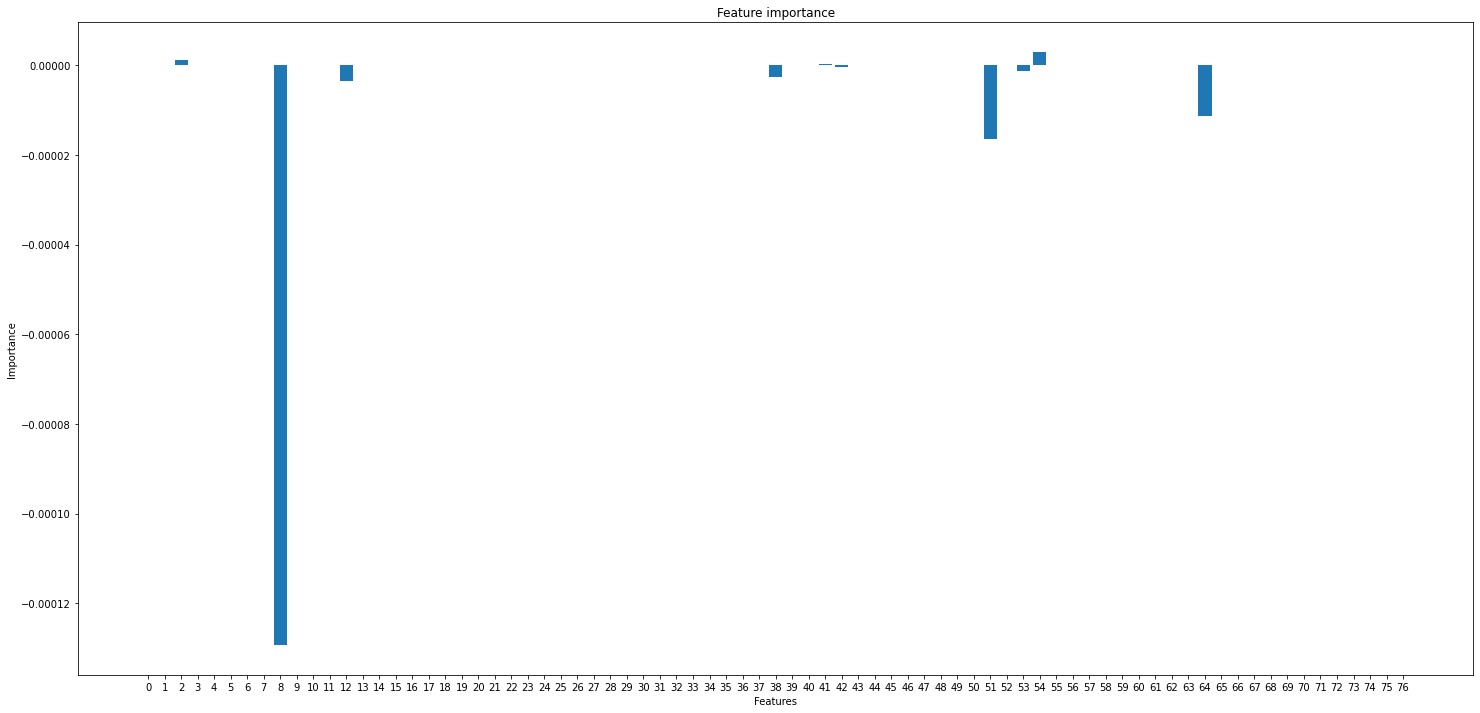

In [43]:
def create_model(x_train, y_train, x_test, y_test):
    model = ElasticNet()
    model.fit(x_train, y_train) 

    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value of test is {round(error_test, 5)}")
    return model


model = create_model(x_train, y_train, x_test, y_test)
importances = model.coef_
feature_importance(importances, "random_forest")

## K-nearest neighbors

In [19]:
KNeighborsRegressor?

Init signature:
KNeighborsRegressor(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
    **kwargs,
)
Docstring:     
Regression based on k-nearest neighbors.

The target is predicted by local interpolation of the targets
associated of the nearest neighbors in the training set.

Read more in the :ref:`User Guide <regression>`.

.. versionadded:: 0.9

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'} or callable, default='uniform'
    weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are furth

In [44]:
def create_model(x_train, y_train, x_test, y_test):
    model = KNeighborsRegressor(n_neighbors = 5)
    model.fit(x_train, y_train)
    
    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value of test is {round(error_test, 5)}")
    return model

        
model = create_model(x_train, y_train, x_test, y_test)
importances = model.feature_importances_
feature_importance(importances, "random_forest")

RMSE value of train is 0.03434
RMSE value of test is 0.04952


AttributeError: 'KNeighborsRegressor' object has no attribute 'coef_'

## XGBoost

In [0]:
def create_model(x_train, y_train, x_test, y_test):
    model = xgb.XGBRegressor()
    model.fit(x_train, y_train)
    
    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value of test is {round(error_test, 5)}")

        
create_model(x_train, y_train, x_test, y_test)

[18:00:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE value of train is 0.00051
RMSE value of test is 0.04899


## Decision tree regression

 * Decision trees tend to overfit on data with a large number of features. Getting the right ratio of samples to number of features is important, since a tree with few samples in high dimensional space is very likely to overfit.

 * Consider performing dimensionality reduction (PCA, ICA, or Feature selection) beforehand to give your tree a better chance of finding features that are discriminative.

 * Understanding the decision tree structure will help in gaining more insights about how the decision tree makes predictions, which is important for understanding the important features in the data.

 * Visualise your tree as you are training by using the export function. Use max_depth=3 as an initial tree depth to get a feel for how the tree is fitting to your data, and then increase the depth.

 * Remember that the number of samples required to populate the tree doubles for each additional level the tree grows to. Use max_depth to control the size of the tree to prevent overfitting.

 * Use min_samples_split or min_samples_leaf to ensure that multiple samples inform every decision in the tree, by controlling which splits will be considered. A very small number will usually mean the tree will overfit, whereas a large number will prevent the tree from learning the data. Try min_samples_leaf=5 as an initial value. If the sample size varies greatly, a float number can be used as percentage in these two parameters. While min_samples_split can create arbitrarily small leaves, min_samples_leaf guarantees that each leaf has a minimum size, avoiding low-variance, over-fit leaf nodes in regression problems. For classification with few classes, min_samples_leaf=1 is often the best choice.

 * Balance your dataset before training to prevent the tree from being biased toward the classes that are dominant. Class balancing can be done by sampling an equal number of samples from each class, or preferably by normalizing the sum of the sample weights (sample_weight) for each class to the same value. Also note that weight-based pre-pruning criteria, such as min_weight_fraction_leaf, will then be less biased toward dominant classes than criteria that are not aware of the sample weights, like min_samples_leaf.

 * If the samples are weighted, it will be easier to optimize the tree structure using weight-based pre-pruning criterion such as min_weight_fraction_leaf, which ensure that leaf nodes contain at least a fraction of the overall sum of the sample weights.

 * All decision trees use np.float32 arrays internally. If training data is not in this format, a copy of the dataset will be made.

 * If the input matrix X is very sparse, it is recommended to convert to sparse csc_matrix before calling fit and sparse csr_matrix before calling predict. Training time can be orders of magnitude faster for a sparse matrix input compared to a dense matrix when features have zero values in most of the samples.

Some advantages of decision trees are:

 * Simple to understand and to interpret. Trees can be visualised.

 * Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.

 * The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.

 * Able to handle both numerical and categorical data. Other techniques are usually specialised in analysing datasets that have only one type of variable. See algorithms for more information.

 * Able to handle multi-output problems.

 * Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.

 * Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.

 * Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

The disadvantages of decision trees include:

 * Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

 * Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

 * The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.

 * There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.

 * Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

In [23]:
DecisionTreeRegressor?

Init signature:
DecisionTreeRegressor(
    *,
    criterion='mse',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    presort='deprecated',
    ccp_alpha=0.0,
)
Docstring:     
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"mse", "friedman_mse", "mae"}, default="mse"
    The function to measure the quality of a split. Supported criteria
    are "mse" for the mean squared error, which is equal to variance
    reduction as feature selection criterion and minimizes the L2 loss
    using the mean of each terminal node, "friedman_mse", which uses mean
    squared error with Friedman's improvement score for potential splits,
    and "mae" for the mean absolute error, which minimizes the L1 loss
    using the median of each term

RMSE value of train is 0.02829
RMSE value of test is 0.03986
Feature 0 "existence expectancy index" has importance of 0.01411
Feature 1 "existence expectancy at birth" has importance of 0.04583
Feature 2 "Gross income per capita" has importance of 0.04871
Feature 3 "Income Index" has importance of 0.0
Feature 4 "Expected years of education (galactic years)" has importance of 0.00259
Feature 5 "Mean years of education (galactic years)" has importance of 0.01662
Feature 6 "Intergalactic Development Index (IDI)" has importance of 0.57756
Feature 7 "Education Index" has importance of 0.09781
Feature 8 "Intergalactic Development Index (IDI), Rank" has importance of 0.10434
Feature 9 "Population using at least basic drinking-water services (%)" has importance of 0.00428
Feature 10 "Population using at least basic sanitation services (%)" has importance of 0.0
Feature 11 "Gross capital formation (% of GGP)" has importance of 0.0
Feature 12 "Population, total (millions)" has importance of 0.0


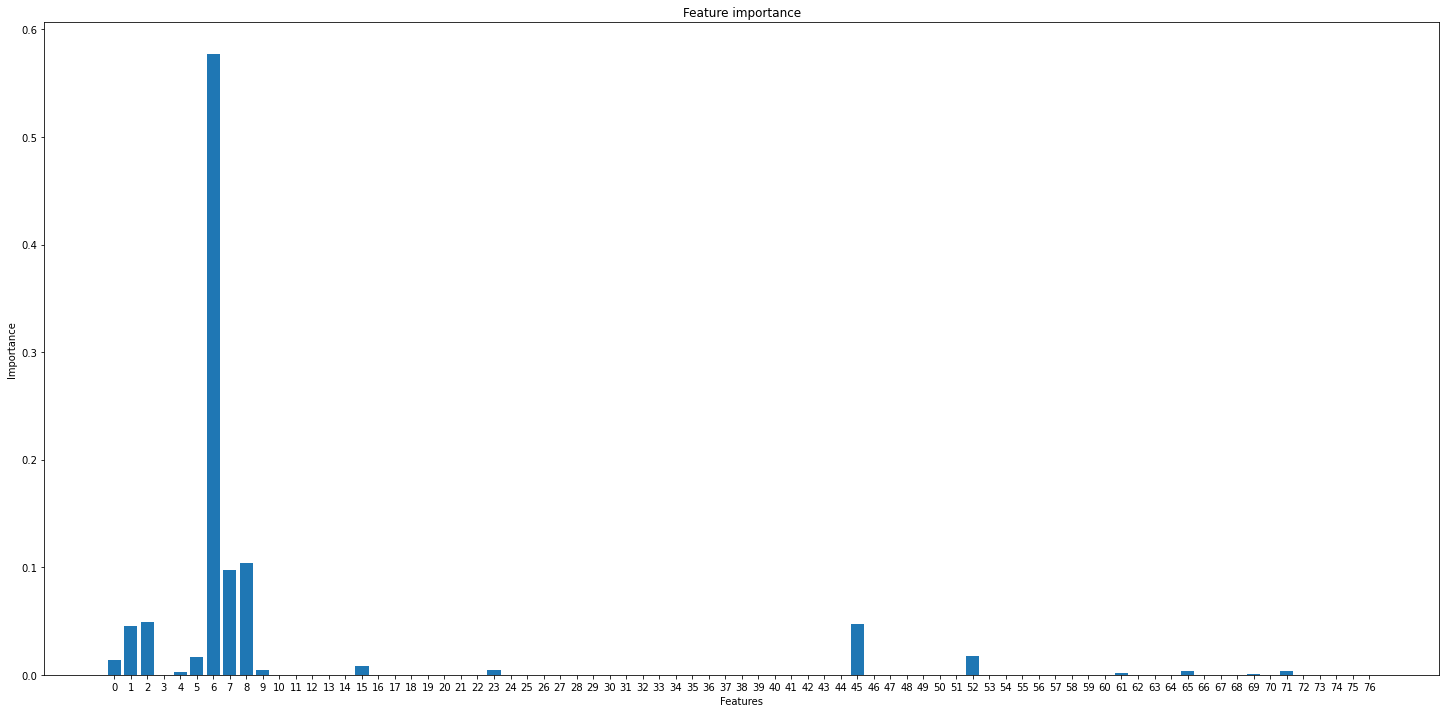

In [45]:
def create_model(x_train, y_train, x_test, y_test):
    model = DecisionTreeRegressor(criterion = "mse", max_depth=5, random_state=0)
    model.fit(x_train, y_train) 

    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value of test is {round(error_test, 5)}")
    return model


model = create_model(x_train, y_train, x_test, y_test)
importances = model.feature_importances_
feature_importance(importances, "random_forest")

## AdaBoost

The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction.

In [24]:
AdaBoostRegressor?

Init signature:
AdaBoostRegressor(
    base_estimator=None,
    *,
    n_estimators=50,
    learning_rate=1.0,
    loss='linear',
    random_state=None,
)
Docstring:     
An AdaBoost regressor.

An AdaBoost [1] regressor is a meta-estimator that begins by fitting a
regressor on the original dataset and then fits additional copies of the
regressor on the same dataset but where the weights of instances are
adjusted according to the error of the current prediction. As such,
subsequent regressors focus more on difficult cases.

This class implements the algorithm known as AdaBoost.R2 [2].

Read more in the :ref:`User Guide <adaboost>`.

.. versionadded:: 0.14

Parameters
----------
base_estimator : object, default=None
    The base estimator from which the boosted ensemble is built.
    If ``None``, then the base estimator is
    ``DecisionTreeRegressor(max_depth=3)``.

n_estimators : int, default=50
    The maximum number of estimators at which boosting is terminated.
    In case of perfe

In [47]:
def create_model(x_train, y_train, x_test, y_test):
    model = AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=100, loss="square", random_state=0)
    model.fit(x_train, y_train) 

    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value of test is {round(error_test, 5)}")
    return model


model = create_model(x_train, y_train, x_test, y_test)
importances = model.feature_importances_
feature_importance(importances, "random_forest")

RMSE value of train is 0.05703
RMSE value of test is 0.06122


AttributeError: 'AdaBoostRegressor' object has no attribute 'coef_'

## Support vector machine

In [25]:
SVR?

Init signature:
SVR(
    *,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    tol=0.001,
    C=1.0,
    epsilon=0.1,
    shrinking=True,
    cache_size=200,
    verbose=False,
    max_iter=-1,
)
Docstring:     
Epsilon-Support Vector Regression.

The free parameters in the model are C and epsilon.

The implementation is based on libsvm. The fit time complexity
is more than quadratic with the number of samples which makes it hard
to scale to datasets with more than a couple of 10000 samples. For large
datasets consider using :class:`sklearn.svm.LinearSVR` or
:class:`sklearn.linear_model.SGDRegressor` instead, possibly after a
:class:`sklearn.kernel_approximation.Nystroem` transformer.

Read more in the :ref:`User Guide <svm_regression>`.

Parameters
----------
kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default='rbf'
     Specifies the kernel type to be used in the algorithm.
     It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' o

In [75]:
def create_model(x_train, y_train, x_test, y_test):
    model = SVR()
    model.fit(x_train, y_train) 

    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value of test is {round(error_test, 5)}")
    return model


model = create_model(x_train, y_train, x_test, y_test)
importances = model.feature_importances_
feature_importance(importances, "random_forest")

RMSE value of train is 0.0609
RMSE value of test is 0.06579


AttributeError: 'SVR' object has no attribute 'feature_importances_'

## Gradient boosting trees

Gradient Tree Boosting or Gradient Boosted Decision Trees (GBDT) is a generalization of boosting to arbitrary differentiable loss functions. GBDT is an accurate and effective off-the-shelf procedure that can be used for both regression and classification problems in a variety of areas including Web search ranking and ecology.

In [26]:
GradientBoostingRegressor?

Init signature:
GradientBoostingRegressor(
    *,
    loss='ls',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    init=None,
    random_state=None,
    max_features=None,
    alpha=0.9,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    presort='deprecated',
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0,
)
Docstring:     
Gradient Boosting for regression.

GB builds an additive model in a forward stage-wise fashion;
it allows for the optimization of arbitrary differentiable loss functions.
In each stage a regression tree is fit on the negative gradient of the
given loss function.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'ls', 'lad', 'huber', 'quantile'}, default='ls'
    loss 

RMSE value of train is 0.0
RMSE value of test is 0.03064
Feature 0 "existence expectancy index" has importance of 0.03808
Feature 1 "existence expectancy at birth" has importance of 0.06583
Feature 2 "Gross income per capita" has importance of 0.20938
Feature 3 "Income Index" has importance of 0.05089
Feature 4 "Expected years of education (galactic years)" has importance of 0.0307
Feature 5 "Mean years of education (galactic years)" has importance of 0.07593
Feature 6 "Intergalactic Development Index (IDI)" has importance of 0.09449
Feature 7 "Education Index" has importance of 0.17508
Feature 8 "Intergalactic Development Index (IDI), Rank" has importance of 0.05003
Feature 9 "Population using at least basic drinking-water services (%)" has importance of 0.00987
Feature 10 "Population using at least basic sanitation services (%)" has importance of 0.01095
Feature 11 "Gross capital formation (% of GGP)" has importance of 0.00692
Feature 12 "Population, total (millions)" has importance 

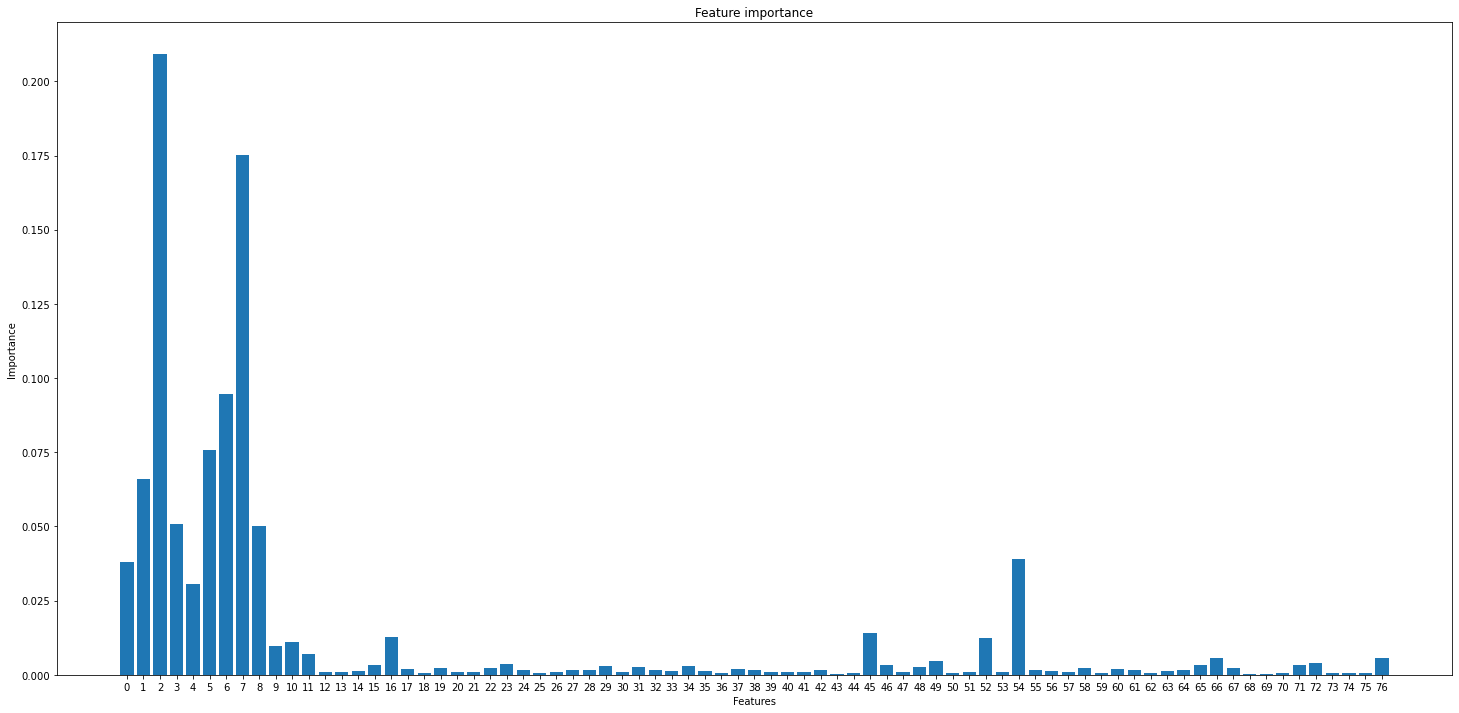

In [48]:
def create_model(x_train, y_train, x_test, y_test):
    model = GradientBoostingRegressor(loss="ls", n_estimators=125, criterion="mse", max_features=0.2, max_depth=None, random_state=0)
    model.fit(x_train, y_train) 

    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value of test is {round(error_test, 5)}")
    return model


model = create_model(x_train, y_train, x_test, y_test)
importances = model.feature_importances_
feature_importance(importances, "random_forest")

## Perceptron

In [27]:
Perceptron?

Init signature:
Perceptron(
    *,
    penalty=None,
    alpha=0.0001,
    fit_intercept=True,
    max_iter=1000,
    tol=0.001,
    shuffle=True,
    verbose=0,
    eta0=1.0,
    n_jobs=None,
    random_state=0,
    early_stopping=False,
    validation_fraction=0.1,
    n_iter_no_change=5,
    class_weight=None,
    warm_start=False,
)
Docstring:     
Perceptron

Read more in the :ref:`User Guide <perceptron>`.

Parameters
----------

penalty : {'l2','l1','elasticnet'}, default=None
    The penalty (aka regularization term) to be used.

alpha : float, default=0.0001
    Constant that multiplies the regularization term if regularization is
    used.

fit_intercept : bool, default=True
    Whether the intercept should be estimated or not. If False, the
    data is assumed to be already centered.

max_iter : int, default=1000
    The maximum number of passes over the training data (aka epochs).
    It only impacts the behavior in the ``fit`` method, and not the
    :meth:`partial_fit` me

In [ ]:
def create_model(x_train, y_train, x_test, y_test):
    model = Perceptron()
    model.fit(x_train, y_train) 

    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value of test is {round(error_test, 5)}")
    return model


model = create_model(x_train, y_train, x_test, y_test)
importances = model.feature_importances_
feature_importance(importances, "random_forest")

# Other Models

## Polynomial regression

In [0]:
def create_model(x_train, y_train, x_test, y_test):
    for degree in range(2, 21):
        polynomial_features= preprocessing.PolynomialFeatures(degree=degree)
        x_train = polynomial_features.fit_transform(x_train)
        x_test = polynomial_features.fit_transform(x_test)
        model = LinearRegression()
        model.fit(x_train, y_train)
        
        predictions_train = model.predict(x_train)
        error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
        print(f"RMSE value of train is {round(error_train, 5)}")

        predictions_test = model.predict(x_test)
        error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
        print(f"RMSE value of test is {round(error_test, 5)}")

        
create_model(x_train, y_train, x_test, y_test)

## Gaussian process

In [0]:
def create_model(x_train, y_train, x_test, y_test):
    model = GaussianProcessRegressor()
    model.fit(x_train, y_train) 

    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value of test is {round(error_test, 5)}")
    return model


model = create_model(x_train, y_train, x_test, y_test)
importances = model.feature_importances_
feature_importance(importances, "random_forest")

## Poisson Regression

In [ ]:
def create_model(x_train, y_train, x_test, y_test):
    model = PoissonRegressor()
    model.fit(x_train, y_train) 

    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value of test is {round(error_test, 5)}")
    return model


model = create_model(x_train, y_train, x_test, y_test)
importances = model.feature_importances_
feature_importance(importances, "random_forest")

## Gamma Regression

In [ ]:
def create_model(x_train, y_train, x_test, y_test):
    model = GammaRegressor()
    model.fit(x_train, y_train) 

    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value of test is {round(error_test, 5)}")
    return model


model = create_model(x_train, y_train, x_test, y_test)
importances = model.feature_importances_
feature_importance(importances, "random_forest")

## Bagging Regression

In [ ]:
def create_model(x_train, y_train, x_test, y_test):
    model = BaggingRegressor()
    model.fit(x_train, y_train) 

    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value of test is {round(error_test, 5)}")
    return model


model = create_model(x_train, y_train, x_test, y_test)
importances = model.feature_importances_
feature_importance(importances, "random_forest")

## Lars Regression

In [ ]:
def create_model(x_train, y_train, x_test, y_test):
    model = Lars()
    model.fit(x_train, y_train) 

    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value of test is {round(error_test, 5)}")
    return model


model = create_model(x_train, y_train, x_test, y_test)
importances = model.feature_importances_
feature_importance(importances, "random_forest")

## Tweedie Regression

In [ ]:
def create_model(x_train, y_train, x_test, y_test):
    model = TweedieRegressor()
    model.fit(x_train, y_train) 

    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value of test is {round(error_test, 5)}")
    return model


model = create_model(x_train, y_train, x_test, y_test)
importances = model.feature_importances_
feature_importance(importances, "random_forest")

## ARD Regression

In [ ]:
def create_model(x_train, y_train, x_test, y_test):
    model = ARDRegressor()
    model.fit(x_train, y_train) 

    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value of test is {round(error_test, 5)}")
    return model


model = create_model(x_train, y_train, x_test, y_test)
importances = model.feature_importances_
feature_importance(importances, "random_forest")

## Bayesian Ridge

In [ ]:
def create_model(x_train, y_train, x_test, y_test):
    model = BayesianRidge()
    model.fit(x_train, y_train) 

    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value of test is {round(error_test, 5)}")
    return model


model = create_model(x_train, y_train, x_test, y_test)
importances = model.feature_importances_
feature_importance(importances, "random_forest")

## Orthogonal Matching Pursuit

In [ ]:
def create_model(x_train, y_train, x_test, y_test):
    model = OrthogonalMatchingPursuit()
    model.fit(x_train, y_train) 

    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value of test is {round(error_test, 5)}")
    return model


model = create_model(x_train, y_train, x_test, y_test)
importances = model.feature_importances_
feature_importance(importances, "random_forest")

## LassoLars Regression

In [ ]:
def create_model(x_train, y_train, x_test, y_test):
    model = LassoLars()
    model.fit(x_train, y_train) 

    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value of test is {round(error_test, 5)}")
    return model


model = create_model(x_train, y_train, x_test, y_test)
importances = model.feature_importances_
feature_importance(importances, "random_forest")

## Theilsen Regression

In [ ]:
def create_model(x_train, y_train, x_test, y_test):
    model = TheilSenRegressor()
    model.fit(x_train, y_train) 

    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value of test is {round(error_test, 5)}")
    return model


model = create_model(x_train, y_train, x_test, y_test)
importances = model.feature_importances_
feature_importance(importances, "random_forest")

## Isotonic Regression

In [ ]:
def create_model(x_train, y_train, x_test, y_test):
    model = IsotonicRegression()
    model.fit(x_train, y_train) 

    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value of test is {round(error_test, 5)}")
    return model


model = create_model(x_train, y_train, x_test, y_test)
importances = model.feature_importances_
feature_importance(importances, "random_forest")

## Kernel Ridge Regression

In [ ]:
def create_model(x_train, y_train, x_test, y_test):
    model = KernelRidge()
    model.fit(x_train, y_train) 

    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value of test is {round(error_test, 5)}")
    return model


model = create_model(x_train, y_train, x_test, y_test)
importances = model.feature_importances_
feature_importance(importances, "random_forest")

## RANSAC Regression

In [ ]:
def create_model(x_train, y_train, x_test, y_test):
    model = RANSACRegressor()
    model.fit(x_train, y_train) 

    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value of test is {round(error_test, 5)}")
    return model


model = create_model(x_train, y_train, x_test, y_test)
importances = model.feature_importances_
feature_importance(importances, "random_forest")

## Huber Regression

In [ ]:
def create_model(x_train, y_train, x_test, y_test):
    model = HuberRegressor()
    model.fit(x_train, y_train) 

    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value of test is {round(error_test, 5)}")
    return model


model = create_model(x_train, y_train, x_test, y_test)
importances = model.feature_importances_
feature_importance(importances, "random_forest")

## Passive Aggressive Regression

In [ ]:
def create_model(x_train, y_train, x_test, y_test):
    model = PassiveAggressiveRegressor()
    model.fit(x_train, y_train) 

    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value of test is {round(error_test, 5)}")
    return model


model = create_model(x_train, y_train, x_test, y_test)
importances = model.feature_importances_
feature_importance(importances, "random_forest")

## Hyperparameter tuning of Extrarandom forest

Two generic approaches to sampling search candidates are provided in scikit-learn: for given values, GridSearchCV exhaustively considers all parameter combinations, while RandomizedSearchCV can sample a given number of candidates from a parameter space with a specified distribution.

In [0]:
data = pd.read_csv("Data/Competition/train.csv")
y = np.array(data["y"])
x = data.drop(["galaxy", "galactic year", "y"], axis = 1)
x = impute.mean(np.array(x))
x = preprocessing.scale(x)
x_train, y_train, x_test, y_test = x[:3000], y[:3000], x[3000:], y[3000:]

In [0]:
data = pd.read_csv("Data/Competition/train.csv")
y = np.array(data["y"])
x = data.drop(["galaxy", "galactic year", "y"], axis = 1)
x = impute.mean(np.array(x))
x = preprocessing.scale(x)
x_train, y_train = x, y

In [0]:
def grid_search(x_train, y_train):
    model = ExtraTreesRegressor(random_state=0)
    param_grid = {
       "criterion" : ["mse"],
       "n_estimators" : [100],
       "max_depth" : [None],
       "min_samples_split" : [2, 5, 15, 25, 100, 250, 1000, 3000],
       "min_samples_leaf" : [2, 5, 15, 25, 100, 250, 1000, 3000], 
       "max_features" : [5, 15, 25, 77]}
    search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1)
    search.fit(x_train, y_train)

    print (search.best_params_)


grid_search(x_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:  5.3min finished


{'criterion': 'mse', 'max_depth': None, 'max_features': 77, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [0]:
def create_model(x_train, y_train, x_test, y_test):
    model = ExtraTreesRegressor(n_estimators=125, criterion="mse", max_features=0.2, max_depth=None, random_state=0) 
    model.fit(x_train, y_train) 

    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value of test is {round(error_test, 5)}")

    
create_model(x_train, y_train, x_test, y_test)

RMSE value of train is 2e-05
RMSE value of test is 0.04887


## Hyperparameter tuning for Ridge regression

In [0]:
data = pd.read_csv("Data/Competition/train.csv")
y = np.array(data["y"])
x = data.drop(["galaxy", "galactic year", "y"], axis = 1)
x = impute.mean(np.array(x))
x = preprocessing.scale(x)
x_train, y_train, x_test, y_test = x[:3000], y[:3000], x[3000:], y[3000:]

In [0]:
data = pd.read_csv("Data/Competition/train.csv")
y = np.array(data["y"])
x = data.drop(["galaxy", "galactic year", "y"], axis = 1)
x = impute.mean(np.array(x))
x = preprocessing.scale(x)
x_train, y_train = x, y

In [0]:
def grid_search(x_train, y_train):
    model = Ridge(random_state=0)
    param_grid = {
       "alpha" : [0.001, 0.01, 0.1, 0.2, 0.5, 0.8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 25, 50, 100],
       "fit_intercept": [True, False], 
       "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
    search = GridSearchCV(model, param_grid, scoring="neg_root_mean_squared_error", cv=5, n_jobs=-1, verbose=1)
    search.fit(x_train, y_train)

    print (search.best_params_)


grid_search(x_train, y_train)

Fitting 5 folds for each of 228 candidates, totalling 1140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 1140 out of 1140 | elapsed:   37.6s finished


{'alpha': 100, 'fit_intercept': True, 'solver': 'saga'}


In [0]:
def create_model(x_train, y_train, x_test, y_test):
    model = Ridge(alpha=10, fit_intercept=True, solver="saga", random_state=0)
    model.fit(x_train, y_train) 

    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value of test is {round(error_test, 5)}")


create_model(x_train, y_train, x_test, y_test)

RMSE value of train is 0.03677
RMSE value of test is 0.06031


## Hyperparameter tuning of Neural network

In [0]:
data = pd.read_csv("Data/Competition/train.csv")
y = np.array(data["y"])
x = data.drop(["galaxy", "galactic year", "y"], axis = 1)
x = impute.mean(np.array(x))
x = preprocessing.scale(x)
x_train, y_train, x_test, y_test = x[:3000], y[:3000], x[3000:], y[3000:]

In [0]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

def create_model(optimizer='rmsprop', init='glorot_uniform', layer1=5, layer2=15):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(15, input_dim=15, kernel_initializer=init, activation="relu"))
    model.add(tf.keras.layers.Dense(dense_nparams, kernel_initializer=init, activation="relu"))
    model.add(tf.keras.layers.Dropout(dropout1))
    model.add(tf.keras.layers.Dense(dense_nparams, kernel_initializer=init, activation="relu"))
    model.add(tf.keras.layers.Dense(1))
    model.compile(loss="mse",
                optimizer=optimizer,
                metrics=[tf.keras.metrics.RootMeanSquaredError()]) 
    return model

model = KerasRegressor(build_fn=create_model)
optimizers = ["rmsprop", "adam"]
init = ["normal", "uniform"]
epochs = np.array([50, 100, 150])
batches = np.array([8, 16, 32])
layer1 = np.array([5, 15, 25, 50, 100, 200])
layer2 = np.array([5, 15, 25, 50, 100, 200])
param_grid = dict(optimizer=optimizers, nb_epoch=epochs, batch_size=batches, init=init, layer1=layer1, layer2=layer2)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(x_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
NameError: name 'dense_nparams' is not defined

  FitFailedWarning)


RuntimeError: ignored

## Hyperparameter tuning of Gradient boosting trees

In [0]:
data = pd.read_csv("Data/Competition/train.csv")
y = np.array(data["y"])
x = data.drop(["galaxy", "galactic year", "y"], axis = 1)
x = x.fillna(0)
x = preprocessing.scale(x)
x_train, y_train, x_test, y_test = x[:3000], y[:3000], x[3000:], y[3000:]

In [0]:
data = pd.read_csv("Data/Competition/train.csv")
y = np.array(data["y"])
x = data.drop(["galaxy", "galactic year", "y"], axis = 1)
x = impute.mode(np.array(x))
x = preprocessing.scale(x)
x_train, y_train = x, y

In [0]:
def grid_search(x_train, y_train):
    model = GradientBoostingRegressor(random_state=0)
    param_grid = {
       "loss" : ["ls"],#, "lad", "huber", "quantile"],
       "criterion" : ["mse"],
       "learning_rate" : [0.1],
       "n_estimators" : [1, 5, 25, 50, 100, 200, 300],
       "max_depth" : [1, 2, 3, 4, 5, 10, 25, 50, 100],
       "min_samples_split" : [10],
       "min_samples_leaf" : [3], 
       "max_features" : ["auto", "sqrt", "log2"]}
    search = GridSearchCV(model, param_grid, scoring="neg_root_mean_squared_error", cv=5, n_jobs=-1, verbose=1)
    search.fit(x_train, y_train)

    print (search.best_params_)


grid_search(x_train, y_train)

In [0]:
def create_model(x_train, y_train, x_test, y_test):
    model = GradientBoostingRegressor(criterion="mse", learning_rate=0.1, loss="huber", max_depth=5, max_features="auto", min_samples_leaf=3, min_samples_split=10, n_estimators=255, random_state=0)
    model.fit(x_train, y_train) 

    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value of test is {round(error_test, 5)}")


create_model(x_train, y_train, x_test, y_test)

RMSE value of train is 0.01236
RMSE value of test is 0.0283


# Find the best value

In [0]:
with open("Data/Competition/score.txt", "a") as f:
    for pca_components in range(1, 78):
        for estimators in range(10, 101):
            data = pd.read_csv("Data/Competition/train.csv")
            y = np.array(data["y"])
            x = data.drop(["galaxy", "galactic year", "y"], axis = 1)
            x = x.fillna(0)

            pca = PCA(n_components=pca_components)
            x_pca = pca.fit_transform(x)
            #print(f"Shape of pca input >> {x_pca.shape}")
            x = x_pca

            regressor = RandomForestRegressor(n_estimators = estimators, random_state = 0) 
            regressor.fit(x[:3000], y[:3000]) 

            predictions = model.predict(x[3075:])
            error = np.sqrt(mean_squared_error(y[3075:], predictions))
            rmse = f"RMSE value for k {k} is {round(error, 5)}"
            print(rmse)
            f.write(rmse)

            score = f"Score on test data with {pca_components} components and {estimators} estimators is {round(regressor.score(x[3075:], y[3075:])*100, 2)} \n"
            print(score)

# Optimization

## Pre optimization

In [0]:
data_train = pd.read_csv("Data/Competition/train.csv")

y = np.array(data_train["y"])
x = data_train.drop(["galaxy", "galactic year", "y"], axis = 1)
x = x.fillna(0)

x_train, y_train, x_val, y_val = x[:3000], y[:3000], x[3000:], y[3000:]

def create_model(x_train, y_train, x_val, y_val):
    model = RandomForestRegressor(n_estimators = 100, random_state = 0) 
    model.fit(x_train, y_train) 

    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of 100 estimators of train is {round(error_train, 5)}")

    predictions_val = model.predict(x_val)
    error_val = np.sqrt(mean_squared_error(y_val, predictions_val))
    print(f"RMSE value of 100 estimators of test is {round(error_val, 5)}")
    return model

    
model = create_model(x_train, y_train, x_val, y_val)


data_test = pd.read_csv("Data/Competition/test.csv")
data_test["Index"] = data_test.index
data_test = data_test.fillna(0)

x_test = data_test.drop(["galaxy", "galactic year", "Index"], axis = 1)
pred = model.predict(x_test)
data_test["pred"] = pred

columns_to_keep = ["Index", "galactic year", "galaxy", "existence expectancy index", "pred"]
data_test = data_test.drop(data_test.columns.difference(columns_to_keep), axis=1)
data_test.head()

RMSE value of 100 estimators of train is 0.00936
RMSE value of 100 estimators of test is 0.04923


,galactic year,galaxy,existence expectancy index,Index,pred
0,1007012,KK98 77,0.456086,0,0.043479
1,1007012,Reticulum III,0.529835,1,0.040813
2,1008016,Reticulum III,0.560976,2,0.041115
3,1007012,Segue 1,0.565910,3,0.042263
4,1013042,Virgo I,0.588274,4,0.043972


## Optimization

### SLSQP

In [0]:
%%time
index_existence = np.array(data_test["existence expectancy index"])
pred = np.array(data_test["pred"])
x0 = np.zeros(len(data_test))

def objective(x):
    return -np.sum((x*(-np.log(pred+0.01)+3)**2)/1000)

def const1(x):
    return np.sum(x)-50000

def const2(x):
    sum_index = 0
    j = 0
    for index in index_existence:
        if index < 0.7:
            sum_index += x[j]
        j+=1
    return sum_index-5000


bound = (0.0, 100.0)
boundaries = []
for i in range(len(data_test)):
    boundaries.append(bound)
boundaries = tuple(boundaries)
c1 = {"type" : "eq", "fun" : const1} 
c2 = {"type" : "ineq", "fun" : const2} 
cs = [c1, c2]
optimization = minimize(objective, x0=x0, options={"disp" : True, "maxiter" : 50000}, method = "SLSQP", bounds=boundaries, constraints=cs)

opt_pred_raw = np.array(optimization.x)
opt_pred = np.round(opt_pred_raw)
data_test["opt_pred_raw"] = opt_pred_raw
data_test["opt_pred"] = opt_pred
data_test.to_csv(f"Data/Competition/su.csv", index=False)
message_optimization = str(optimization.message) + "\n"
message_function = f"Sum of increase in indexes after optimization >> {-optimization.fun}\n"
print(message_optimization)
print(message_function)
sum_raw = np.sum(data_test["opt_pred_raw"])
message_sum_raw = f"Sum of total allocation of energy in raw pred >> {sum_raw}\n"
print(message_sum_raw)
sum_rounded = np.sum(data_test["opt_pred"])
message_sum_rounded = f"Sum of total allocation of energy in rounded pred >> {sum_rounded}\n"
print(message_sum_rounded)
sum_index_raw = 0
j = 0
for index in index_existence:
    if index < 0.7:
        sum_index_raw += data_test["opt_pred_raw"][j]
    j+=1
message_sum_index_raw = f"Sum of energy alllocation for galaxies with energy < 0.7 in raw pred >> {sum_index_raw}\n"
print(message_sum_index_raw)
sum_index_rounded = 0
j = 0
for index in index_existence:
    if index < 0.7:
        sum_index_rounded += data_test["opt_pred"][j]
    j+=1
message_sum_index_rounded = f"Sum of energy alllocation for galaxies with energy < 0.7 in rounded pred >> {sum_index_rounded}\n"
print(message_sum_index_rounded)
data_test = data_test.drop(["galactic year", "galaxy", "existence expectancy index", "opt_pred_raw"], axis = 1)
data_test.to_csv("Data/Competition/su_final.csv", index=False)

KeyboardInterrupt: ignored

### Trust-constr

In [0]:
%%time
index_existence = np.array(data_test["existence expectancy index"])
pred = np.array(data_test["pred"])
x0 = np.zeros(len(data_test))

def objective(x):
    return -np.sum((x*(-np.log(pred+0.01)+3)**2)/1000)

def const1(x):
    return np.sum(x)-50000

def const2(x):
    sum_index = 0
    j = 0
    for index in index_existence:
        if index < 0.7:
            sum_index += x[j]
        j+=1
    return sum_index-5000


bound = (0.0, 100.0)
boundaries = []
for i in range(len(data_test)):
    boundaries.append(bound)
boundaries = tuple(boundaries)
c1 = {"type" : "eq", "fun" : const1} 
c2 = {"type" : "ineq", "fun" : const2} 
cs = [c1, c2]
optimization = minimize(objective, x0=x0, options={"disp" : True, "maxiter" : 50000}, method = "trust-constr", bounds=boundaries, constraints=cs)

opt_pred_raw = np.array(optimization.x)
opt_pred = np.round(opt_pred_raw)
data_test["opt_pred_raw"] = opt_pred_raw
data_test["opt_pred"] = opt_pred
data_test.to_csv(f"Data/Competition/su.csv", index=False)
message_optimization = str(optimization.message) + "\n"
message_function = f"Sum of increase in indexes after optimization >> {-optimization.fun}\n"
print(message_optimization)
print(message_function)
sum_raw = np.sum(data_test["opt_pred_raw"])
message_sum_raw = f"Sum of total allocation of energy in raw pred >> {sum_raw}\n"
print(message_sum_raw)
sum_rounded = np.sum(data_test["opt_pred"])
message_sum_rounded = f"Sum of total allocation of energy in rounded pred >> {sum_rounded}\n"
print(message_sum_rounded)
sum_index_raw = 0
j = 0
for index in index_existence:
    if index < 0.7:
        sum_index_raw += data_test["opt_pred_raw"][j]
    j+=1
message_sum_index_raw = f"Sum of energy alllocation for galaxies with energy < 0.7 in raw pred >> {sum_index_raw}\n"
print(message_sum_index_raw)
sum_index_rounded = 0
j = 0
for index in index_existence:
    if index < 0.7:
        sum_index_rounded += data_test["opt_pred"][j]
    j+=1
message_sum_index_rounded = f"Sum of energy alllocation for galaxies with energy < 0.7 in rounded pred >> {sum_index_rounded}\n"
print(message_sum_index_rounded)
data_test = data_test.drop(["galactic year", "galaxy", "existence expectancy index", "opt_pred_raw"], axis = 1)
data_test.to_csv("Data/Competition/su_final.csv", index=False)

### Std 35

In [0]:
index_existence = np.array(data_test["existence expectancy index"])
pred = np.array(data_test["pred"])
x0 = np.zeros(len(data_test))

def objective(x):
    return -np.sum((x*(-np.log(pred+0.01)+3)**2)/1000)

def const1(x):
    return np.sum(x)-50000

def const2(x):
    sum_index = 0
    j = 0
    for index in index_existence:
        if index < 0.7:
            sum_index += x[j]
        j+=1
    return sum_index-5000

def const3(x):
    return 35-np.std(x)

def const4(x):
    return np.std(x)-5

bound = (0.0, 100.0)
boundaries = []
for i in range(len(data_test)):
    boundaries.append(bound)
boundaries = tuple(boundaries)
c1 = {"type" : "eq", "fun" : const1} 
c2 = {"type" : "ineq", "fun" : const2} 
c3 = {"type" : "ineq", "fun" : const3}
c4 = {"type" : "ineq", "fun" : const4}
cs = [c1, c2, c3, c4]

optimization = minimize(objective, x0=x0, options={"disp" : True, "maxiter" : 50000}, method = "SLSQP", bounds=boundaries, constraints=cs)
opt_pred_raw = np.array(optimization.x)
opt_pred = np.round(opt_pred_raw)
data_test["opt_pred_raw"] = opt_pred_raw
data_test["opt_pred"] = opt_pred
data_test.to_csv(f"Data/Competition/su.csv", index=False)
message_optimization = str(optimization.message) + "\n"
message_function = f"Sum of increase in indexes after optimization >> {-optimization.fun}\n"
print(message_optimization)
print(message_function)
sum_raw = np.sum(data_test["opt_pred_raw"])
message_sum_raw = f"Sum of total allocation of energy in raw pred >> {sum_raw}\n"
print(message_sum_raw)
sum_rounded = np.sum(data_test["opt_pred"])
message_sum_rounded = f"Sum of total allocation of energy in rounded pred >> {sum_rounded}\n"
print(message_sum_rounded)
sum_index_raw = 0
j = 0
for index in index_existence:
    if index < 0.7:
        sum_index_raw += data_test["opt_pred_raw"][j]
    j+=1
message_sum_index_raw = f"Sum of energy alllocation for galaxies with energy < 0.7 in raw pred >> {sum_index_raw}\n"
print(message_sum_index_raw)
sum_index_rounded = 0
j = 0
for index in index_existence:
    if index < 0.7:
        sum_index_rounded += data_test["opt_pred"][j]
    j+=1
message_sum_index_rounded = f"Sum of energy alllocation for galaxies with energy < 0.7 in rounded pred >> {sum_index_rounded}\n"
print(message_sum_index_rounded)

RMSE value of 100 estimators of train is 0.00936
RMSE value of 100 estimators of test is 0.04923


KeyboardInterrupt: ignored

# Finding best std value for optimization

In [0]:
%%time
with open("Data/Competition/optimization_std.txt", "a") as f:
    #[100, 90, 80, 70, 60, 50, 45, 40, 35, 30, 25, 20, 15, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
    for std in [45, 40, 35, 30, 25, 20, 15, 10, 9, 8, 7, 6, 5]:
        message_std = f"Std >> {std}\n"
        print(message_std)
        f.write(message_std)


        data_train = pd.read_csv("Data/Competition/train.csv")

        y = np.array(data_train["y"])
        x = data_train.drop(["galaxy", "galactic year", "y"], axis = 1)
        x = x.fillna(0)

        x_train, y_train, x_val, y_val = x[:3000], y[:3000], x[3000:], y[3000:]

        def create_model(x_train, y_train, x_val, y_val):
            model = RandomForestRegressor(n_estimators = 100, random_state = 0) 
            model.fit(x_train, y_train) 

            predictions_train = model.predict(x_train)
            error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
            print(f"RMSE value of 100 estimators of train is {round(error_train, 5)}")

            predictions_val = model.predict(x_val)
            error_val = np.sqrt(mean_squared_error(y_val, predictions_val))
            print(f"RMSE value of 100 estimators of test is {round(error_val, 5)}")
            return model

            
        model = create_model(x_train, y_train, x_val, y_val)


        data_test = pd.read_csv("Data/Competition/test.csv")
        data_test["Index"] = data_test.index
        data_test = data_test.fillna(0)

        x_test = data_test.drop(["galaxy", "galactic year", "Index"], axis = 1)
        pred = model.predict(x_test)
        data_test["pred"] = pred

        columns_to_keep = ["Index", "galactic year", "galaxy", "existence expectancy index", "pred"]
        data_test = data_test.drop(data_test.columns.difference(columns_to_keep), axis=1)


        index_existence = np.array(data_test["existence expectancy index"])
        pred = np.array(data_test["pred"])
        x0 = np.zeros(len(data_test))

        def objective(x):
            return -np.sum((x*(-np.log(pred+0.01)+3)**2)/1000)

        def const1(x):
            return np.sum(x)-50000

        def const2(x):
            sum_index = 0
            j = 0
            for index in index_existence:
                if index < 0.7:
                    sum_index += x[j]
                j+=1
            return sum_index-5000

        def const3(x):
            return std-np.std(x)


        bound = (0.0, 100.0)
        boundaries = []
        for i in range(len(data_test)):
            boundaries.append(bound)
        boundaries = tuple(boundaries)
        c1 = {"type" : "eq", "fun" : const1} 
        c2 = {"type" : "ineq", "fun" : const2} 
        c3 = {"type" : "ineq", "fun" : const3}
        cs = [c1, c2, c3]
        try:
            optimization = minimize(objective, x0=x0, options={"disp" : True, "maxiter" : 50000}, method = "SLSQP", bounds=boundaries, constraints=cs)
        except Exception as e:
            f.write(str(e))
            continue
        opt_pred_raw = np.array(optimization.x)
        opt_pred = np.round(opt_pred_raw)
        data_test["opt_pred_raw"] = opt_pred_raw
        data_test["opt_pred"] = opt_pred
        data_test.to_csv(f"Data/Competition/su_{std}.csv", index=False)
        message_optimization = str(optimization.message) + "\n"
        message_function = f"Sum of increase in indexes after optimization >> {-optimization.fun}\n"
        print(message_optimization)
        print(message_function)
        f.write(message_optimization)
        f.write(message_function)
        sum_raw = np.sum(data_test["opt_pred_raw"])
        message_sum_raw = f"Sum of total allocation of energy in raw pred >> {sum_raw}\n"
        print(message_sum_raw)
        f.write(message_sum_raw)
        sum_rounded = np.sum(data_test["opt_pred"])
        message_sum_rounded = f"Sum of total allocation of energy in rounded pred >> {sum_rounded}\n"
        print(message_sum_rounded)
        f.write(message_sum_rounded)
        sum_index_raw = 0
        j = 0
        for index in index_existence:
            if index < 0.7:
                sum_index_raw += data_test["opt_pred_raw"][j]
            j+=1
        message_sum_index_raw = f"Sum of energy alllocation for galaxies with energy < 0.7 in raw pred >> {sum_index_raw}\n"
        print(message_sum_index_raw)
        f.write(message_sum_index_raw)
        sum_index_rounded = 0
        j = 0
        for index in index_existence:
            if index < 0.7:
                sum_index_rounded += data_test["opt_pred"][j]
            j+=1
        message_sum_index_rounded = f"Sum of energy alllocation for galaxies with energy < 0.7 in rounded pred >> {sum_index_rounded}\n"
        print(message_sum_index_rounded)
        f.write(message_sum_index_rounded)



Std >> 45

RMSE value of 100 estimators of train is 0.00936
RMSE value of 100 estimators of test is 0.04923
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1650.2945327723846
            Iterations: 274
            Function evaluations: 244408
            Gradient evaluations: 274
Optimization terminated successfully.

Sum of increase in indexes after optimization >> 1650.2945327723846

Sum of total allocation of energy in raw pred >> 50000.00000000197

Sum of total allocation of energy in rounded pred >> 50010.0

Sum of energy alllocation for galaxies with energy < 0.7 in raw pred >> 7099.9999999925

Sum of energy alllocation for galaxies with energy < 0.7 in rounded pred >> 7100.0

Std >> 40

RMSE value of 100 estimators of train is 0.00936
RMSE value of 100 estimators of test is 0.04923
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1637.9125141328554
            Iterations: 135
            Func

# Finding best method for optimization

In [0]:
%%time
with open("Data/Competition/optimization.txt", "a") as f:
    for method in ["Nelder-Mead", "Powell", "CG", "BFGS", "Newton-CG", "L-BFGS-B", "TNC", "COBYLA", "SLSQP", "trust-constr", "dogleg", "trust-ncg", "trust-exact", "trust-krylov"]:
        message_method = f"{method}\n"
        print(message_method)
        f.write(message_method)
        data_train = pd.read_csv("Data/Competition/train.csv")

        y = np.array(data_train["y"])
        x = data_train.drop(["galaxy", "galactic year", "y"], axis = 1)
        x = x.fillna(0)

        x_train, y_train, x_val, y_val = x[:3000], y[:3000], x[3000:], y[3000:]

        def create_model(x_train, y_train, x_val, y_val):
            model = RandomForestRegressor(n_estimators = 100, random_state = 0) 
            model.fit(x_train, y_train) 

            predictions_train = model.predict(x_train)
            error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
            print(f"RMSE value of 100 estimators of train is {round(error_train, 5)}")

            predictions_val = model.predict(x_val)
            error_val = np.sqrt(mean_squared_error(y_val, predictions_val))
            print(f"RMSE value of 100 estimators of test is {round(error_val, 5)}")
            return model

            
        model = create_model(x_train, y_train, x_val, y_val)


        data_test = pd.read_csv("Data/Competition/test.csv")
        data_test["Index"] = data_test.index
        data_test = data_test.fillna(0)

        x_test = data_test.drop(["galaxy", "galactic year", "Index"], axis = 1)
        pred = model.predict(x_test)
        data_test["pred"] = pred

        columns_to_keep = ["Index", "galactic year", "galaxy", "existence expectancy index", "pred"]
        data_test = data_test.drop(data_test.columns.difference(columns_to_keep), axis=1)


        index_existence = np.array(data_test["existence expectancy index"])
        pred = np.array(data_test["pred"])
        x0 = np.zeros(len(data_test))

        def objective(x):
            return -np.sum((x*(-np.log(pred+0.01)+3)**2)/1000)

        def const1(x):
            return np.sum(x)-50000

        def const2(x):
            sum_index = 0
            j = 0
            for index in index_existence:
                if index < 0.7:
                    sum_index += x[j]
                j+=1
            return sum_index-5000


        bound = (0.0, 100.0)
        boundaries = []
        for i in range(len(data_test)):
            boundaries.append(bound)
        boundaries = tuple(boundaries)
        c1 = {"type" : "eq", "fun" : const1} 
        c2 = {"type" : "ineq", "fun" : const2} 
        cs = [c1, c2]

        try:
            optimization = minimize(objective, x0=x0, options={"disp" : True, "maxiter" : 50000}, method = method, bounds=boundaries, constraints=cs)
        except Exception as e:
            f.write(str(e))
            continue
        opt_pred_raw = np.array(optimization.x)
        opt_pred = np.round(opt_pred_raw)
        data_test["opt_pred_raw"] = opt_pred_raw
        data_test["opt_pred"] = opt_pred
        data_test.to_csv(f"Data/Competition/su_{method}.csv", index=False)
        message_optimization = str(optimization.message) + "\n"
        message_function = f"Sum of increase in indexes after optimization >> {-optimization.fun}\n"
        print(message_optimization)
        print(message_function)
        f.write(message_optimization)
        f.write(message_function)
        sum_raw = np.sum(data_test["opt_pred_raw"])
        message_sum_raw = f"Sum of total allocation of energy in raw pred >> {sum_raw}\n"
        print(message_sum_raw)
        f.write(message_sum_raw)
        sum_rounded = np.sum(data_test["opt_pred"])
        message_sum_rounded = f"Sum of total allocation of energy in rounded pred >> {sum_rounded}\n"
        print(message_sum_rounded)
        f.write(message_sum_rounded)
        sum_index_raw = 0
        j = 0
        for index in index_existence:
            if index < 0.7:
                sum_index_raw += data_test["opt_pred_raw"][j]
            j+=1
        message_sum_index_raw = f"Sum of energy alllocation for galaxies with energy < 0.7 in raw pred >> {sum_index_raw}\n"
        print(message_sum_index_raw)
        f.write(message_sum_index_raw)
        sum_index_rounded = 0
        j = 0
        for index in index_existence:
            if index < 0.7:
                sum_index_rounded += data_test["opt_pred"][j]
            j+=1
        message_sum_index_rounded = f"Sum of energy alllocation for galaxies with energy < 0.7 in rounded pred >> {sum_index_rounded}\n"
        print(message_sum_index_rounded)
        f.write(message_sum_index_rounded)



Nelder-Mead
RMSE value of 100 estimators of train is 0.00936
RMSE value of 100 estimators of test is 0.04923


/usr/local/lib/python3.6/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  RuntimeWarning)


Maximum number of iterations has been exceeded.

Sum of increase in indexes after optimization >> 0.0003610397451466584

Sum of total allocation of energy in raw pred with Nelder-Mead >> 0.00179007705132362

Sum of total allocation of energy in rounded pred with Nelder-Mead >> 0.0

Sum of energy alllocation for galaxies with energy < 0.7 in raw pred with Nelder-Mead >> 0.006349614552353159

Sum of energy alllocation for galaxies with energy < 0.7 in rounded pred with Nelder-Mead >> 0.0

Powell
RMSE value of 100 estimators of train is 0.00936
RMSE value of 100 estimators of test is 0.04923


/usr/local/lib/python3.6/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method Powell cannot handle constraints nor bounds.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:2376: RuntimeWarning: overflow encountered in double_scalars
  if (w - xc) * (xb - w) > 0.0:
/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:2392: RuntimeWarning: overflow encountered in double_scalars
  elif (w - wlim)*(wlim - xc) >= 0.0:
/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:2371: RuntimeWarning: overflow encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:2364: RuntimeWarning: overflow encountered in double_scalars
  tmp1 = (xb - xa) * (fb - fc)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:2365: RuntimeWarning: overflow encountered in double_scalars
  tmp2 = (xb - xc) * (fb - fa)
/usr/local/lib/pyt

Optimization terminated successfully.
         Current function value: -inf
         Iterations: 1
         Function evaluations: 11499
Optimization terminated successfully.

Sum of increase in indexes after optimization >> inf

Sum of total allocation of energy in raw pred with Powell >> 1.222630064450763e+307

Sum of total allocation of energy in rounded pred with Powell >> 1.222630064450763e+307

Sum of energy alllocation for galaxies with energy < 0.7 in raw pred with Powell >> 1.222630064450763e+307

Sum of energy alllocation for galaxies with energy < 0.7 in rounded pred with Powell >> 1.222630064450763e+307

CG
RMSE value of 100 estimators of train is 0.00936
RMSE value of 100 estimators of test is 0.04923


/usr/local/lib/python3.6/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)


Optimization terminated successfully.
         Current function value: -4373246.557734
         Iterations: 1
         Function evaluations: 11596
         Gradient evaluations: 13
Optimization terminated successfully.

Sum of increase in indexes after optimization >> 4373246.557734277

Sum of total allocation of energy in raw pred with CG >> 145305814.7566818

Sum of total allocation of energy in rounded pred with CG >> 145305834.0

Sum of energy alllocation for galaxies with energy < 0.7 in raw pred with CG >> 13881188.919765258

Sum of energy alllocation for galaxies with energy < 0.7 in rounded pred with CG >> 13881189.0

BFGS
RMSE value of 100 estimators of train is 0.00936
RMSE value of 100 estimators of test is 0.04923


/usr/local/lib/python3.6/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)


Optimization terminated successfully.
         Current function value: -4373246.557734
         Iterations: 1
         Function evaluations: 11596
         Gradient evaluations: 13
Optimization terminated successfully.

Sum of increase in indexes after optimization >> 4373246.557734277

Sum of total allocation of energy in raw pred with BFGS >> 145305814.7566818

Sum of total allocation of energy in rounded pred with BFGS >> 145305834.0

Sum of energy alllocation for galaxies with energy < 0.7 in raw pred with BFGS >> 13881188.919765258

Sum of energy alllocation for galaxies with energy < 0.7 in rounded pred with BFGS >> 13881189.0

Newton-CG
RMSE value of 100 estimators of train is 0.00936
RMSE value of 100 estimators of test is 0.04923
L-BFGS-B


/usr/local/lib/python3.6/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method Newton-CG cannot handle constraints nor bounds.
  RuntimeWarning)


RMSE value of 100 estimators of train is 0.00936
RMSE value of 100 estimators of test is 0.04923


/usr/local/lib/python3.6/dist-packages/scipy/optimize/_minimize.py:525: RuntimeWarning: Method L-BFGS-B cannot handle constraints.
  RuntimeWarning)


b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'

Sum of increase in indexes after optimization >> 2598.270596580215

Sum of total allocation of energy in raw pred with L-BFGS-B >> 89000.0

Sum of total allocation of energy in rounded pred with L-BFGS-B >> 89000.0

Sum of energy alllocation for galaxies with energy < 0.7 in raw pred with L-BFGS-B >> 7100.0

Sum of energy alllocation for galaxies with energy < 0.7 in rounded pred with L-BFGS-B >> 7100.0

TNC
RMSE value of 100 estimators of train is 0.00936
RMSE value of 100 estimators of test is 0.04923


/usr/local/lib/python3.6/dist-packages/scipy/optimize/_minimize.py:525: RuntimeWarning: Method TNC cannot handle constraints.
  RuntimeWarning)


Local minimum reached (|pg| ~= 0)

Sum of increase in indexes after optimization >> 2598.270596580215

Sum of total allocation of energy in raw pred with TNC >> 89000.0

Sum of total allocation of energy in rounded pred with TNC >> 89000.0

Sum of energy alllocation for galaxies with energy < 0.7 in raw pred with TNC >> 7100.0

Sum of energy alllocation for galaxies with energy < 0.7 in rounded pred with TNC >> 7100.0

COBYLA
RMSE value of 100 estimators of train is 0.00936
RMSE value of 100 estimators of test is 0.04923
SLSQP


/usr/local/lib/python3.6/dist-packages/scipy/optimize/_minimize.py:528: RuntimeWarning: Method COBYLA cannot handle bounds.
  RuntimeWarning)


RMSE value of 100 estimators of train is 0.00936
RMSE value of 100 estimators of test is 0.04923
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1654.581449559416
            Iterations: 1047
            Function evaluations: 933924
            Gradient evaluations: 1047
Optimization terminated successfully.

Sum of increase in indexes after optimization >> 1654.581449559416

Sum of total allocation of energy in raw pred with SLSQP >> 50000.00000016973

Sum of total allocation of energy in rounded pred with SLSQP >> 49998.0

Sum of energy alllocation for galaxies with energy < 0.7 in raw pred with SLSQP >> 7099.999999972699

Sum of energy alllocation for galaxies with energy < 0.7 in rounded pred with SLSQP >> 7100.0

trust-constr
RMSE value of 100 estimators of train is 0.00936
RMSE value of 100 estimators of test is 0.04923


/usr/local/lib/python3.6/dist-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


`xtol` termination condition is satisfied.
Number of iterations: 454, function evaluations: 514998, CG iterations: 2714, optimality: 3.37e-06, constraint violation: 0.00e+00, execution time: 1.7e+03 s.
`xtol` termination condition is satisfied.

Sum of increase in indexes after optimization >> 1654.6080571074624

Sum of total allocation of energy in raw pred with trust-constr >> 50000.0

Sum of total allocation of energy in rounded pred with trust-constr >> 50000.0

Sum of energy alllocation for galaxies with energy < 0.7 in raw pred with trust-constr >> 7099.9998375409095

Sum of energy alllocation for galaxies with energy < 0.7 in rounded pred with trust-constr >> 7100.0

dogleg
RMSE value of 100 estimators of train is 0.00936
RMSE value of 100 estimators of test is 0.04923
trust-ncg


/usr/local/lib/python3.6/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method dogleg cannot handle constraints nor bounds.
  RuntimeWarning)


RMSE value of 100 estimators of train is 0.00936
RMSE value of 100 estimators of test is 0.04923
trust-exact


/usr/local/lib/python3.6/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method trust-ncg cannot handle constraints nor bounds.
  RuntimeWarning)


RMSE value of 100 estimators of train is 0.00936
RMSE value of 100 estimators of test is 0.04923
trust-krylov
RMSE value of 100 estimators of train is 0.00936
RMSE value of 100 estimators of test is 0.04923
CPU times: user 2h 3min 13s, sys: 5min 17s, total: 2h 8min 30s
Wall time: 1h 43min 13s


# Solution 1

In [0]:
%%time

#Importing training data, separating x from y
data = pd.read_csv("Data/Competition/train.csv")
y = np.array(data["y"])
x = data.drop(["galaxy", "galactic year", "y"], axis = 1)

#Cleaning of x
x = x.fillna(0)
x = preprocessing.scale(x)
x_train, y_train = x, y

#Creating model
def neural_network(x_train, y_train):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(100, input_dim=77, kernel_initializer="uniform", activation="relu"))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(25, kernel_initializer="uniform", activation="relu"))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(5, kernel_initializer="uniform", activation="relu"))
    model.add(tf.keras.layers.Dense(1))

    model.compile(loss="mse",
                optimizer="adam",
                metrics=[tf.keras.metrics.RootMeanSquaredError()]) 

    model.fit(x_train, y_train, epochs=255, verbose=0)
    #loss, rmse = model.evaluate(x_test, y_test)
    #score = f"RMSE value of test is {round(rmse, 5)}"
    #print(score)
    return model

def gradient_boosting_trees(x_train, y_train):
    model = model = GradientBoostingRegressor(loss="ls", n_estimators=125, criterion="mse", max_depth=None, random_state=0)
    model.fit(x_train, y_train) 

    #predictions_train = model.predict(x_train)
    #error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    #print(f"RMSE value of train is {round(error_train, 5)}")

    #predictions_test = model.predict(x_test)
    #error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    #print(f"RMSE value of test is {round(error_test, 5)}")
    return model

def extra_trees(x_train, y_train):
    model = ExtraTreesRegressor(criterion="mse", max_depth=None,  n_estimators=125, random_state=0)
    model.fit(x_train, y_train) 

    #predictions_train = model.predict(x_train)
    #error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    #print(f"RMSE value of train is {round(error_train, 5)}")

    #predictions_test = model.predict(x_test)
    #error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    #print(f"RMSE value of test is {round(error_test, 5)}")
    return model


model = gradient_boosting_trees(x_train, y_train)
print("Model")

#Importing test data
data_test = pd.read_csv("Data/Competition/test.csv")
data_test["Index"] = data_test.index

#Cleaning of x
x_test = data_test.drop(["galaxy", "galactic year", "Index"], axis = 1)
x_test = x_test.fillna(0)
x_test = preprocessing.scale(x_test)

#Predictions
pred = model.predict(x_test)
data_test["pred"] = pred
print("Predictions")

#Preparing data for optimization
columns_to_keep = ["Index", "galactic year", "galaxy", "existence expectancy index", "pred"]
data_test = data_test.drop(data_test.columns.difference(columns_to_keep), axis=1)

#Optimization
index_existence = np.array(data_test["existence expectancy index"])
pred = np.array(data_test["pred"])
x0 = np.zeros(len(data_test))

def objective(x):
    return -np.sum((x*(-np.log(pred+0.01)+3)**2)/1000)

def const1(x):
    return np.sum(x)-50000

def const2(x):
    sum_index = 0
    j = 0
    for index in index_existence:
        if index < 0.7:
            sum_index += x[j]
        j+=1
    return sum_index-5000

def const3(x):
    return 35-np.std(x)

def const4(x):
    return np.std(x)-5

bound = (0.0, 100.0)
boundaries = []
for i in range(len(data_test)):
    boundaries.append(bound)
boundaries = tuple(boundaries)
c1 = {"type" : "eq", "fun" : const1} 
c2 = {"type" : "ineq", "fun" : const2} 
c3 = {"type" : "ineq", "fun" : const3}
c4 = {"type" : "ineq", "fun" : const4}
cs = [c1, c2, c3, c4]
print("Optimization")
optimization = minimize(objective, x0=x0, options={"disp" : True, "maxiter" : 50000}, method = "SLSQP", bounds=boundaries, constraints=cs)
opt_pred_raw = np.array(optimization.x)
opt_pred = np.floor(opt_pred_raw)
data_test["opt_pred_raw"] = opt_pred_raw
data_test["opt_pred"] = opt_pred
data_test.to_csv(f"Data/Competition/su.csv", index=False)
message_optimization = str(optimization.message) + "\n"
message_function = f"Sum of increase in indexes after optimization >> {-optimization.fun}\n"
print(message_optimization)
print(message_function)
sum_raw = np.sum(data_test["opt_pred_raw"])
message_sum_raw = f"Sum of total allocation of energy in raw pred >> {sum_raw}\n"
print(message_sum_raw)
sum_rounded = np.sum(data_test["opt_pred"])
message_sum_rounded = f"Sum of total allocation of energy in rounded pred >> {sum_rounded}\n"
print(message_sum_rounded)
sum_index_raw = 0
j = 0
for index in index_existence:
    if index < 0.7:
        sum_index_raw += data_test["opt_pred_raw"][j]
    j+=1
message_sum_index_raw = f"Sum of energy alllocation for galaxies with energy < 0.7 in raw pred >> {sum_index_raw}\n"
print(message_sum_index_raw)
sum_index_rounded = 0
j = 0
for index in index_existence:
    if index < 0.7:
        sum_index_rounded += data_test["opt_pred"][j]
    j+=1
message_sum_index_rounded = f"Sum of energy alllocation for galaxies with energy < 0.7 in rounded pred >> {sum_index_rounded}\n"
print(message_sum_index_rounded)
data_test = data_test.drop(["galactic year", "galaxy", "existence expectancy index", "opt_pred_raw"], axis = 1)
data_test.to_csv("Data/Competition/su_final.csv", index=False)

Model
Predictions
Optimization
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1616.8605889967116
            Iterations: 114
            Function evaluations: 101692
            Gradient evaluations: 114
Optimization terminated successfully.

Sum of increase in indexes after optimization >> 1616.8605889967116

Sum of total allocation of energy in raw pred >> 50000.00000000022

Sum of total allocation of energy in rounded pred >> 49554.0

Sum of energy alllocation for galaxies with energy < 0.7 in raw pred >> 5212.345330732417

Sum of energy alllocation for galaxies with energy < 0.7 in rounded pred >> 5181.0

CPU times: user 3min 25s, sys: 252 ms, total: 3min 26s
Wall time: 3min 26s


# Solution 2

In [0]:
def data_cleaning(dataset):
    data = pd.read_csv(f"Data/Competition/{dataset}.csv")
    data["Index"] = data.index
    data = data.drop(["Population using at least basic drinking-water services (%)", "Population using at least basic sanitation services (%)"], axis = 1) #because more than 50% of data is missing in training
    data = data.sort_values(by=["galactic year", "galaxy"], ascending=[True, True]) 
    data.to_csv(f"Data/Competition/{dataset}_sorted.csv", index=False)

data_cleaning("train")
data_cleaning("test")

## Left data

In [0]:
data_left = pd.read_csv(f"Data/Competition/train_sorted_left.csv")
x = data_left.drop(["galaxy", "galactic year", "Index", "y"], axis = 1)
y = np.array(data_left["y"])
x = impute.mean(np.array(x))
x = preprocessing.scale(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [0]:
def create_model(x_train, y_train, x_test, y_test):
    model = RandomForestRegressor(n_estimators=125, random_state=0) 
    model.fit(x_train, y_train) 

    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value test is {round(error_test, 5)}")


create_model(x_train, y_train, x_test, y_test)

In [8]:
def create_model(x_train, y_train, x_test, y_test):
    model = LinearRegression()
    model.fit(x_train, y_train) 

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    return round(error_test, 5)

rmse = 0
for i in range(1, 100):
    data_left = pd.read_csv(f"Data/Competition/train_sorted_left.csv")
    x = data_left.drop(["galaxy", "galactic year", "Index", "y"], axis = 1)
    y = np.array(data_left["y"])
    x = impute.mean(np.array(x))
    #x = impute.mode(np.array(x))
    #x = impute.fast_knn(np.array(x), k=3)
    #tr = IterativeImputer(max_iter=125, random_state=0).fit(x)
    #x = tr.transform(x)
    #x = x.fillna(0)
    #x = preprocessing.normalize(x)
    x = preprocessing.scale(x)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    rmse += create_model(x_train, y_train, x_test, y_test)

rmse_average=rmse/100
print(rmse_average)

0.0382722


In [3]:
%%time

#Importing training data, separating x from y
data_left = pd.read_csv(f"Data/Competition/train_sorted_left.csv")
x = data_left.drop(["galaxy", "galactic year", "Index", "y"], axis = 1)
y = np.array(data_left["y"])

#Cleaning of x
x = impute.mean(np.array(x))
x = preprocessing.scale(x)
x_train, y_train = x, y

#Creating model
def create_model(x_train, y_train):
    model = RandomForestRegressor(n_estimators=125) 
    model.fit(x_train, y_train) 

    #predictions_train = model.predict(x_train)
    #error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    #print(f"RMSE value of train is {round(error_train, 5)}")

    #predictions_test = model.predict(x_test)
    #error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    #print(f"RMSE value test is {round(error_test, 5)}")
    return model

print("Model")
model = create_model(x_train, y_train)

#Importing test data
data_test_left = pd.read_csv("Data/Competition/test_sorted_left.csv")
x_test = data_test_left.drop(["galaxy", "galactic year", "Index"], axis = 1)

#Cleaning of x
x_test = x_test.fillna(0)
x_test = preprocessing.scale(x_test)

#Predictions
print("Predictions")
pred = model.predict(x_test)
data_test_left["pred"] = pred

#Preparing data for optimization
columns_to_keep = ["Index", "galactic year", "galaxy", "existence expectancy index", "pred"]
data_test_left = data_test_left.drop(data_test_left.columns.difference(columns_to_keep), axis=1)
data_test_left = data_test_left.sort_values(by=["Index"], ascending=True) 
data_test_left.to_csv(f"Data/Competition/predictions_left.csv", index=False)

Model
Predictions
CPU times: user 2.15 s, sys: 9.92 ms, total: 2.16 s
Wall time: 3.8 s


## Right data

In [0]:
data_right = pd.read_csv(f"Data/Competition/train_sorted_right.csv")
x = data_right.drop(["galaxy", "galactic year", "Index", "y"], axis = 1)
y = np.array(data_right["y"])
x = impute.mean(np.array(x))
x = preprocessing.scale(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [0]:
def create_model(x_train, y_train, x_test, y_test):
    model = RandomForestRegressor(n_estimators=125) 
    model.fit(x_train, y_train) 

    predictions_train = model.predict(x_train)
    error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print(f"RMSE value of train is {round(error_train, 5)}")

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print(f"RMSE value test is {round(error_test, 5)}")


create_model(x_train, y_train, x_test, y_test)

RMSE value of train is 0.01177
RMSE value test is 0.02535


In [0]:
def create_model(x_train, y_train, x_test, y_test):
    model = RandomForestRegressor(n_estimators=125, random_state=0) 
    model.fit(x_train, y_train) 

    predictions_test = model.predict(x_test)
    error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    return round(error_test, 5)

rmse = 0
for i in range(1, 100):
    data_right = pd.read_csv(f"Data/Competition/train_sorted_right.csv")
    x = data_right.drop(["galaxy", "galactic year", "Index", "y"], axis = 1)
    y = np.array(data_right["y"])
    x = impute.mean(np.array(x))
    x = preprocessing.scale(x)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    rmse += create_model(x_train, y_train, x_test, y_test)

rmse_average=rmse/100
print(rmse_average)

In [4]:
%%time

#Importing training data, separating x from y
data_right = pd.read_csv(f"Data/Competition/train_sorted_right.csv")
x = data_right.drop(["galaxy", "galactic year", "Index", "y"], axis = 1)
y = np.array(data_right["y"])

#Cleaning of x
x = impute.mean(np.array(x))
x = preprocessing.scale(x)
x_train, y_train = x, y

#Creating model
def create_model(x_train, y_train):
    model = RandomForestRegressor(n_estimators=125) 
    model.fit(x_train, y_train) 

    #predictions_train = model.predict(x_train)
    #error_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    #print(f"RMSE value of train is {round(error_train, 5)}")

    #predictions_test = model.predict(x_test)
    #error_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    #print(f"RMSE value test is {round(error_test, 5)}")
    return model

print("Model")
model = create_model(x_train, y_train)

#Importing test data
data_test_right = pd.read_csv("Data/Competition/test_sorted_right.csv")
x_test = data_test_right.drop(["galaxy", "galactic year", "Index"], axis = 1)

#Cleaning of x
x_test = impute.mean(np.array(x_test))
x_test = preprocessing.scale(x_test)

#Predictions
print("Predictions")
pred = model.predict(x_test)
data_test_right["pred"] = pred

#Preparing data for optimization
columns_to_keep = ["Index", "galactic year", "galaxy", "existence expectancy index", "pred"]
data_test_right = data_test_right.drop(data_test_right.columns.difference(columns_to_keep), axis=1)
data_test_right = data_test_right.sort_values(by=["Index"], ascending=True) 
data_test_right.to_csv(f"Data/Competition/predictions_right.csv", index=False)

Model
Predictions
CPU times: user 8.22 s, sys: 877 µs, total: 8.22 s
Wall time: 9.31 s


## Optimization

In [9]:
#Optimization
data_test = pd.read_csv(f"Data/Competition/predictions.csv")
data_test = data_test.sort_values(by="Index", ascending=True) 
index_existence = np.array(data_test["existence expectancy index"])
pred = np.array(data_test["pred"])
x0 = np.zeros(len(data_test))

def objective(x):
    return -np.sum((x*(-np.log(pred+0.01)+3)**2)/1000)

def const1(x):
    return np.sum(x)-50000

def const2(x):
    sum_index = 0
    j = 0
    for index in index_existence:
        if index < 0.7:
            sum_index += x[j]
        j+=1
    return sum_index-5000

def const3(x):
    return 35-np.std(x)

def const4(x):
    return np.std(x)-5

bound = (0.0, 100.0)
boundaries = []
for i in range(len(data_test)):
    boundaries.append(bound)
boundaries = tuple(boundaries)
c1 = {"type" : "eq", "fun" : const1} 
c2 = {"type" : "ineq", "fun" : const2} 
c3 = {"type" : "ineq", "fun" : const3}
c4 = {"type" : "ineq", "fun" : const4}
cs = [c1, c2]#, c3, c4]
print("Optimization")
optimization = minimize(objective, x0=x0, options={"disp" : True, "maxiter" : 50000}, method = "SLSQP", bounds=boundaries, constraints=cs)
opt_pred_raw = np.array(optimization.x)
opt_pred = np.floor(opt_pred_raw)
data_test["opt_pred_raw"] = opt_pred_raw
data_test["opt_pred"] = opt_pred
data_test.to_csv(f"Data/Competition/su.csv", index=False)
message_optimization = str(optimization.message) + "\n"
message_function = f"Sum of increase in indexes after optimization >> {-optimization.fun}\n"
print(message_optimization)
print(message_function)
sum_raw = np.sum(data_test["opt_pred_raw"])
message_sum_raw = f"Sum of total allocation of energy in raw pred >> {sum_raw}\n"
print(message_sum_raw)
sum_rounded = np.sum(data_test["opt_pred"])
message_sum_rounded = f"Sum of total allocation of energy in rounded pred >> {sum_rounded}\n"
print(message_sum_rounded)
sum_index_raw = 0
j = 0
for index in index_existence:
    if index < 0.7:
        sum_index_raw += data_test["opt_pred_raw"][j]
    j+=1
message_sum_index_raw = f"Sum of energy alllocation for galaxies with energy < 0.7 in raw pred >> {sum_index_raw}\n"
print(message_sum_index_raw)
sum_index_rounded = 0
j = 0
for index in index_existence:
    if index < 0.7:
        sum_index_rounded += data_test["opt_pred"][j]
    j+=1
message_sum_index_rounded = f"Sum of energy alllocation for galaxies with energy < 0.7 in rounded pred >> {sum_index_rounded}\n"
print(message_sum_index_rounded)
data_test = data_test.drop(["galactic year", "galaxy", "existence expectancy index", "opt_pred"], axis = 1)
data_test.to_csv("Data/Competition/su_final.csv", index=False)

Optimization
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1723.5866731186893
            Iterations: 1282
            Function evaluations: 1143545
            Gradient evaluations: 1282
Optimization terminated successfully.

Sum of increase in indexes after optimization >> 1723.5866731186893

Sum of total allocation of energy in raw pred >> 50000.00000007789

Sum of total allocation of energy in rounded pred >> 49969.0

Sum of energy alllocation for galaxies with energy < 0.7 in raw pred >> 6600.0

Sum of energy alllocation for galaxies with energy < 0.7 in rounded pred >> 6600.0



In [0]:
x = x.drop(["Intergalactic Development Index (IDI), Rank",
    "Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))",
    "Life expectancy at birth, male (galactic years)",
    "Life expectancy at birth, female (galactic years)",
    "Total unemployment rate (female to male ratio)",
    "Employment to population ratio (% ages 15 and older)",
    "Youth unemployment rate (female to male ratio)",
    "Share of employment in nonagriculture, female (% of total employment in nonagriculture)",
    "Gross galactic product (GGP) per capita",
    "Mean years of education, female (galactic years)",
    "Mean years of education, male (galactic years)",
    "Expected years of education, female (galactic years)",
    "Expected years of education, male (galactic years)",
    "Estimated gross galactic income per capita, male",
    "Estimated gross galactic income per capita, female",
    "Population with at least some secondary education, female (% ages 25 and older)",
    "Population with at least some secondary education, male (% ages 25 and older)",
    "Intergalactic Development Index (IDI), female",
    "Intergalactic Development Index (IDI), male",
    "Intergalactic Development Index (IDI), female, Rank",
    "Intergalactic Development Index (IDI), male, Rank",
    "Labour force participation rate (% ages 15 and older), female",
    "Mortality rate, female grown up (per 1,000 people)",
    "Mortality rate, male grown up (per 1,000 people)",
    "Infants lacking immunization, red hot disease (% of one-galactic year-olds)",
    "Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)"], axis = 1)

In [0]:
ss = pd.DataFrame({
    'Index':test.index,
    'pred':test['y'],
    'opt_pred':0, 
    'eei':test['existence expectancy index'] # So we can split into low and high EEI galaxies
})
# Fix opt_pred
n_low_eei = ss.loc[ss.eei < 0.7].shape[0]
n_high_eei = ss.loc[ss.eei >= 0.7].shape[0]
ss.loc[ss.eei < 0.7, 'opt_pred'] = 99 # 66*99 = 6534 - >10%, <100 each
ss.loc[ss.eei >= 0.7, 'opt_pred'] = (50000-6534)/n_high_eei # The rest to high eei gs
# Leaving 5k zillion whatsits to the admin
ss = ss.drop('eei', axis=1)
ss.to_csv('Sub_test.csv', index=False)
ss.head()